# What is marketing campaign?
Marketing campaigns are characterized by focusing on the customer needs and their satisfaction. There are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

# What is a Deposit?
A  bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time

# Attributes of the dataset
## Bank client data:
* age: (numeric)
* job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
* marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education: (categorical: primary, secondary, tertiary and unknown)
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
* balance: Balance of the individual.

## Related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone','unknown')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day: last contact day of the month (numeric:1,2,......,30,31)
* duration: last contact duration, in seconds (numeric).

## Other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success')

## Output variable (desired target):
* has the client subscribed a term deposit? (categorical: 'yes','no')

# What is data exploration?
Data exploration is the initial step in extracting insights from raw datasets where you dive into a dataset to get a feel for what it contains. It's like detective work for your data, where you uncover its characteristics, patterns, and potential problems.rs?


# Importing and Exploring dataset

In [6]:
#Importing necessary libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for numerical operations
import seaborn as sns   #for creating visualizations
import matplotlib.pyplot as plt #for creating visualizations

In [14]:
#reading the dataset
df= pd.read_csv(r"C:\Users\dell\Downloads\bank.csv")

In [16]:
#displaying first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
#displaying last 5 rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [20]:
#displaying 5 random rows
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4311,30,admin.,married,secondary,no,0,no,no,cellular,1,jun,318,1,-1,0,unknown,yes
1127,38,management,married,tertiary,no,1308,yes,no,cellular,2,feb,626,1,-1,0,unknown,yes
9099,55,retired,married,secondary,no,241,yes,no,unknown,20,jun,14,6,-1,0,unknown,no
6879,34,blue-collar,married,primary,no,5299,yes,no,unknown,26,jun,75,5,-1,0,unknown,no
10020,35,blue-collar,married,primary,no,526,yes,no,cellular,2,feb,914,2,-1,0,unknown,no


In [22]:
#summary statistics of numerical columns in the the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


* Balance can not be negative (noise)

In [25]:
#displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


* The dataset contains both numeric and categorical data

In [28]:
#diplaying the number of unique values of each column
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [30]:
df.shape

(11162, 17)

* The dataframe contains 17 columns(faetures) and 11162 rows

In [33]:
#check if the data contains any null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* The dataset doesnt contain any null values

In [36]:
#check if there are any duplicated rows
df.duplicated().sum()

0

* No duplication in the dataset

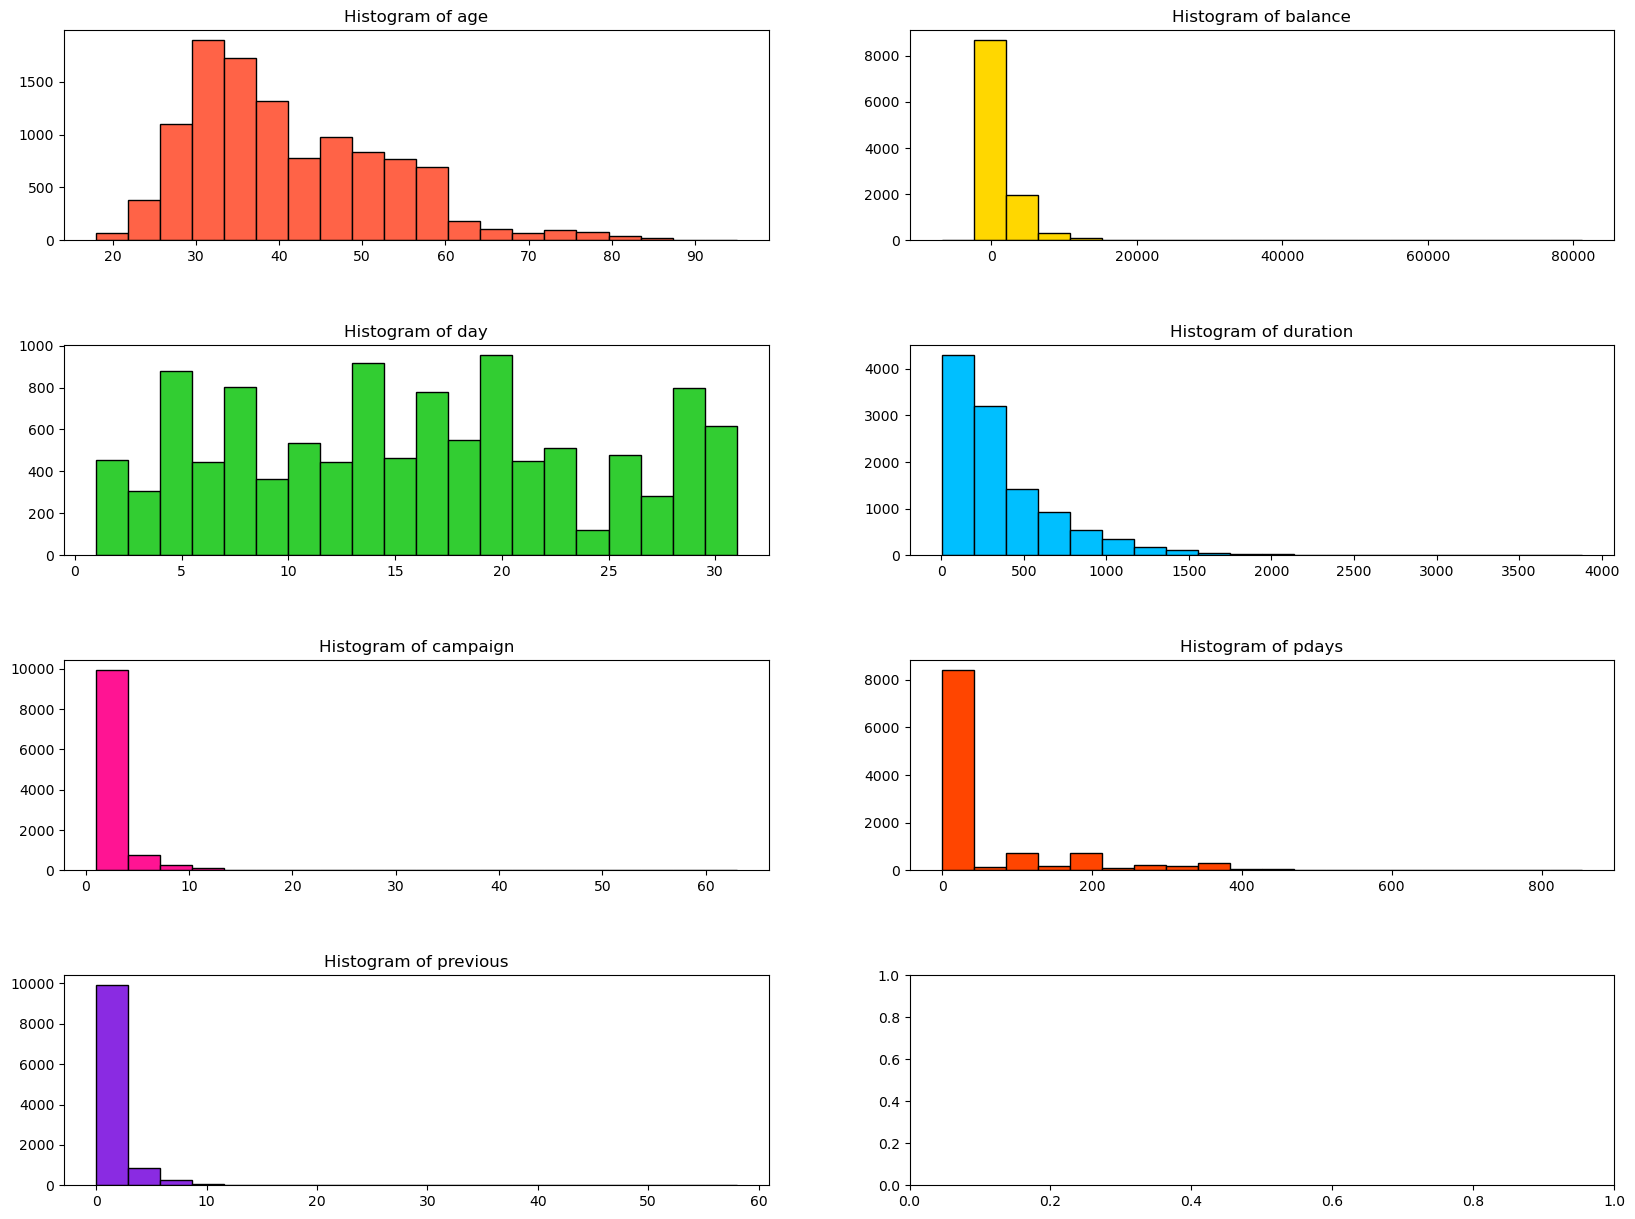

In [39]:
#plotting the distribution of each numer column
numeric_columns =  df.select_dtypes(include=['number']).columns
colors = ['#FF6347','#FFD700','#32CD32','#00BFFF','#FF1493','#FF4500','#8A2BE2','#00FA9A','#FF8C00','#1E90FF']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,15))  
axes = axes.flatten()  
#iterate through each numeric column
for i,column in enumerate(numeric_columns):
    df[column].hist(bins=20,color=colors[i],edgecolor='black',ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].grid(False)
plt.subplots_adjust(hspace=0.5)
plt.show()

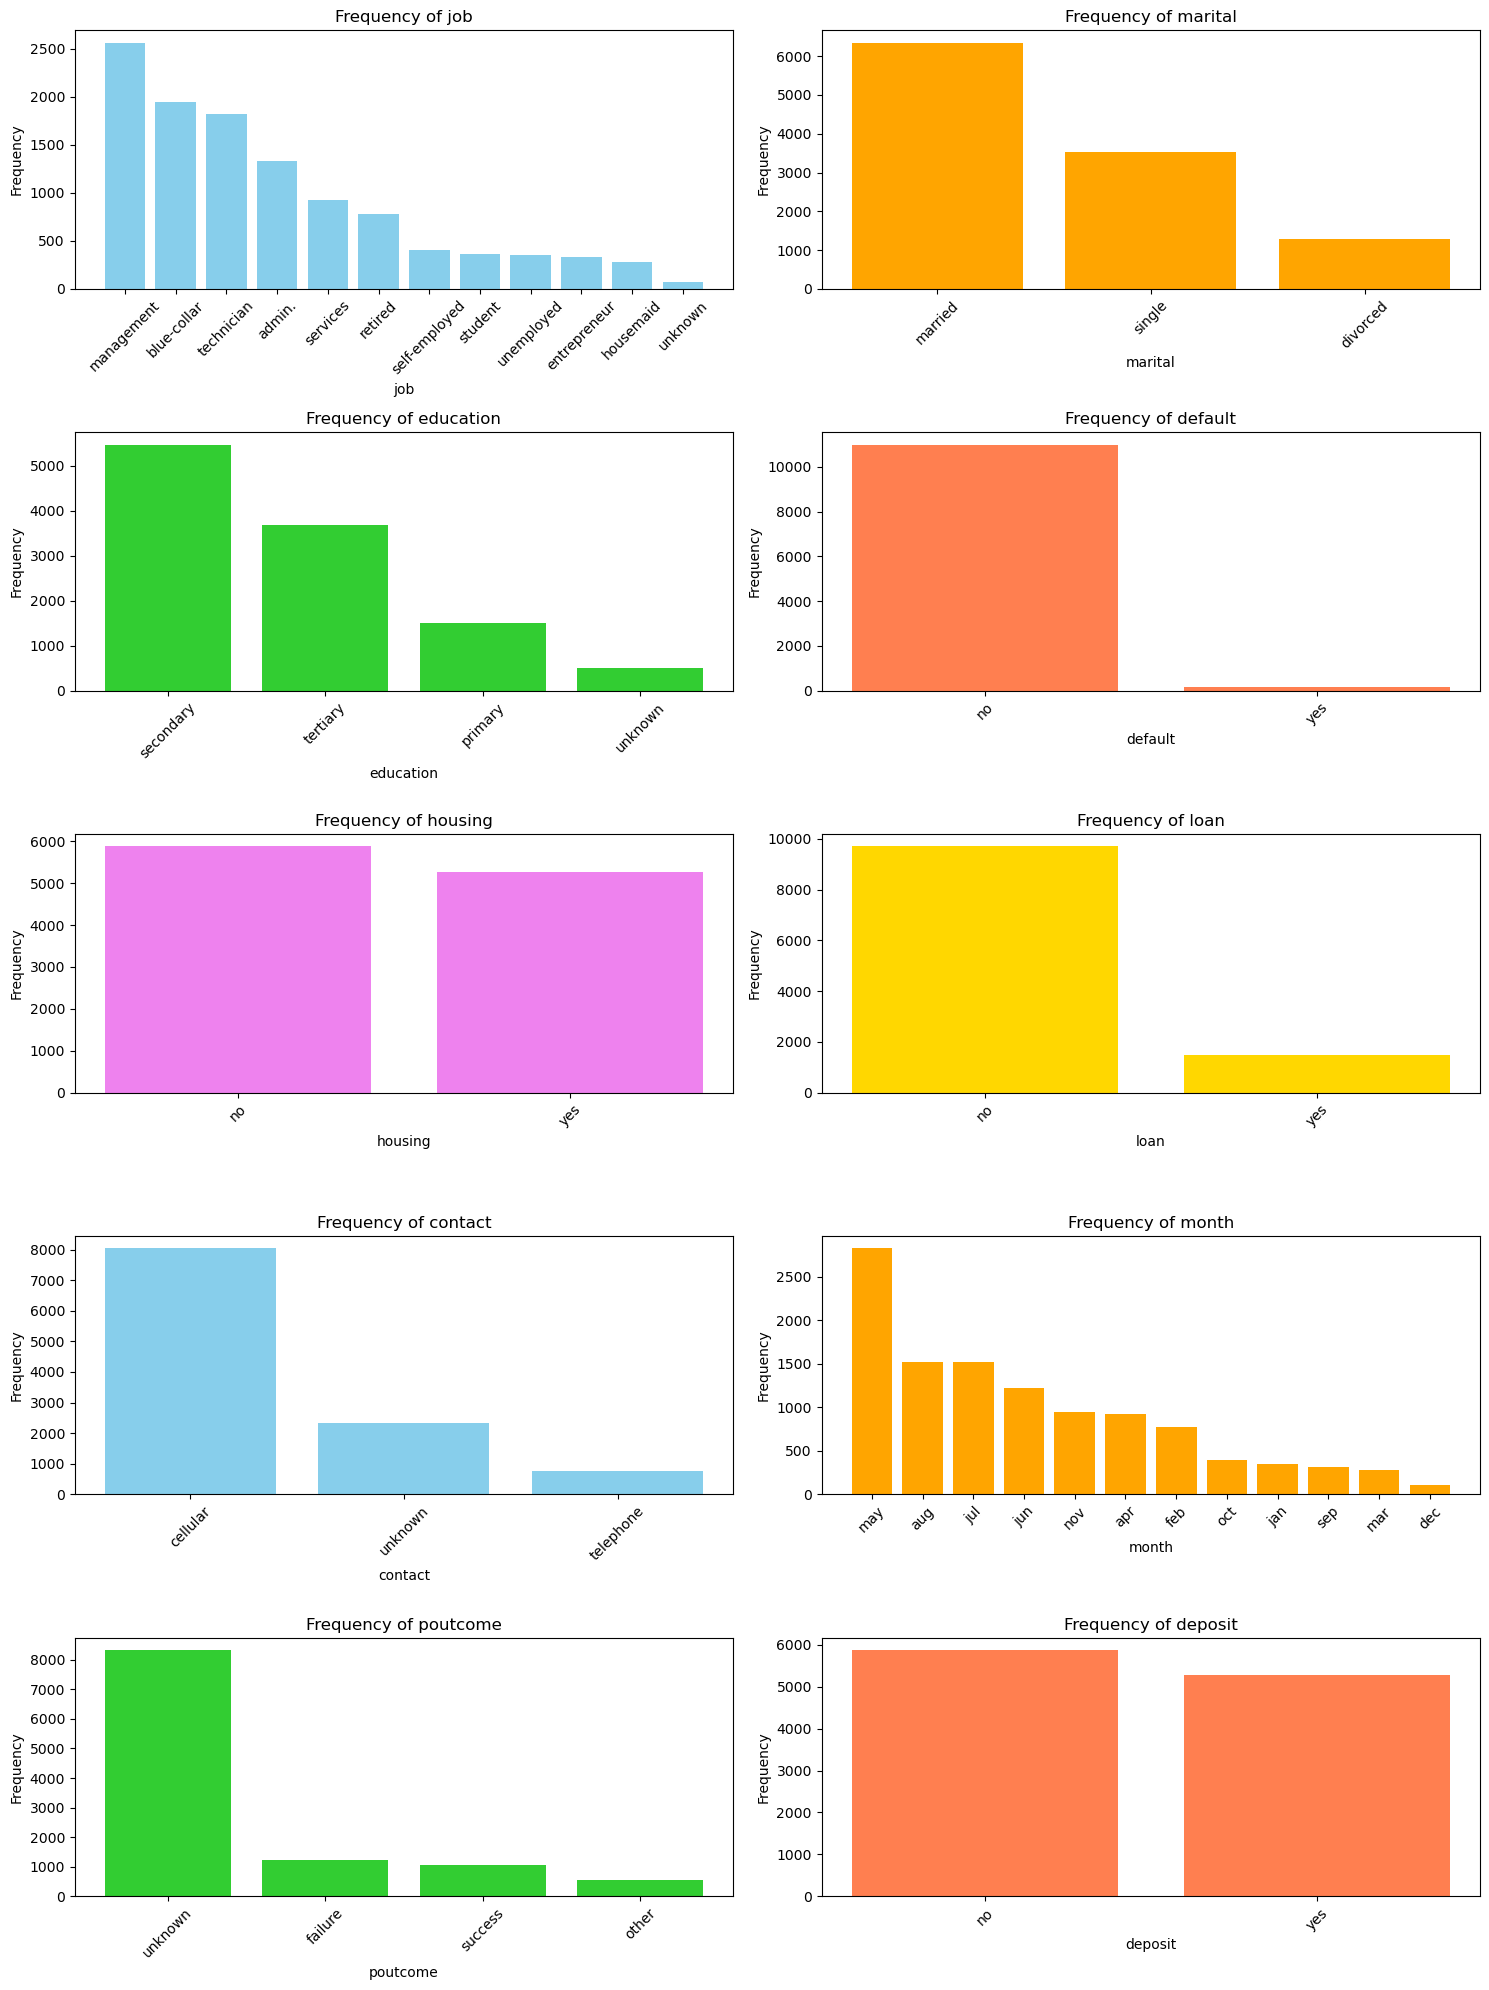

In [40]:
#select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create subplots
fig, axes = plt.subplots(5,2,figsize=(15,20))
axes = axes.flatten() 

colors = ['skyblue','orange','limegreen','coral','violet','gold']

#iterate through each categorical column
for i,column in enumerate(categorical_columns):
    ax = axes[i] 
    value_counts = df[column].value_counts()  #frequency counts for each category
    ax.bar(value_counts.index, value_counts.values, color=colors[i%len(colors)])  
    ax.set_title(f'Frequency of {column}') 
    ax.set_xlabel(column) 
    ax.set_ylabel('Frequency') 
    ax.tick_params(axis='x',rotation=45) 

plt.tight_layout()
plt.show()

* We can see from the deposit visualization that the dataset is approximatley balanced

In [42]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

# Data preprocessing
It is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

## Data cleaning

* No null values or duplicates in the dataset

In [47]:
#balance cant have -ve values (inconsistency)
df = df[df['balance'] >= 0]
print(df['balance'].describe())


count    10474.000000
mean      1650.212526
std       3291.662302
min          0.000000
25%        183.250000
50%        625.000000
75%       1840.750000
max      81204.000000
Name: balance, dtype: float64


In [48]:
df.shape

(10474, 17)

* The number of rows has slightly decreased after removing inconsistencies

In [54]:
df['deposit'].value_counts()

deposit
no     5395
yes    5079
Name: count, dtype: int64

## Feature scaling
It is a technique to standardize the independent features present in the data in a fixed range. It handles highly varying features. It also helps in speeding up the calculations in an algorithm.

## Encoding categorical data
Since machine learning model completely works on mathematics and numbers, then it may create trouble while building the model. So it is necessary to encode these categorical variables into numbers.
* one hot encoder creates a binary column for each category. It is useful if the categories do not have any ordinal relationship (nominal data).

## splitting the data
We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set is used to fit the model. The second set is called the test data set, this set is solely used for predictions.

In [59]:
from sklearn.model_selection import train_test_split  #splitting the dataset into training and testing sets
from sklearn.compose import ColumnTransformer         #applying transformations to specific columns
from sklearn.preprocessing import OneHotEncoder       #encoding categorical features into numerical ones
from sklearn.preprocessing import StandardScaler      #scaling numerical features to have zero mean and unit variance

#deposit has values only(yes/no) so the easiest way is to map values to 1,0
#separate features (X) and target variable (y)
X = df.drop('deposit', axis=1)  
y = df['deposit'].map({'yes': 1, 'no': 0})


categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

#split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define preprocessing for encoding only
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  #encode categorical features
    ],
    remainder='passthrough'  #keep numerical features unchanged
)

#define preprocessing for both encoding and scaling
encoder_scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  #scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  #encode categorical features
    ]
)

#get the names of new columns after encoding
encoder.fit(X_train)
encoded_columns = encoder.get_feature_names_out(input_features=X_train.columns)

#apply encoding only
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

#apply both encoding and scaling
X_train_scaled = encoder_scaler.fit_transform(X_train)
X_test_scaled = encoder_scaler.transform(X_test)


## outliers

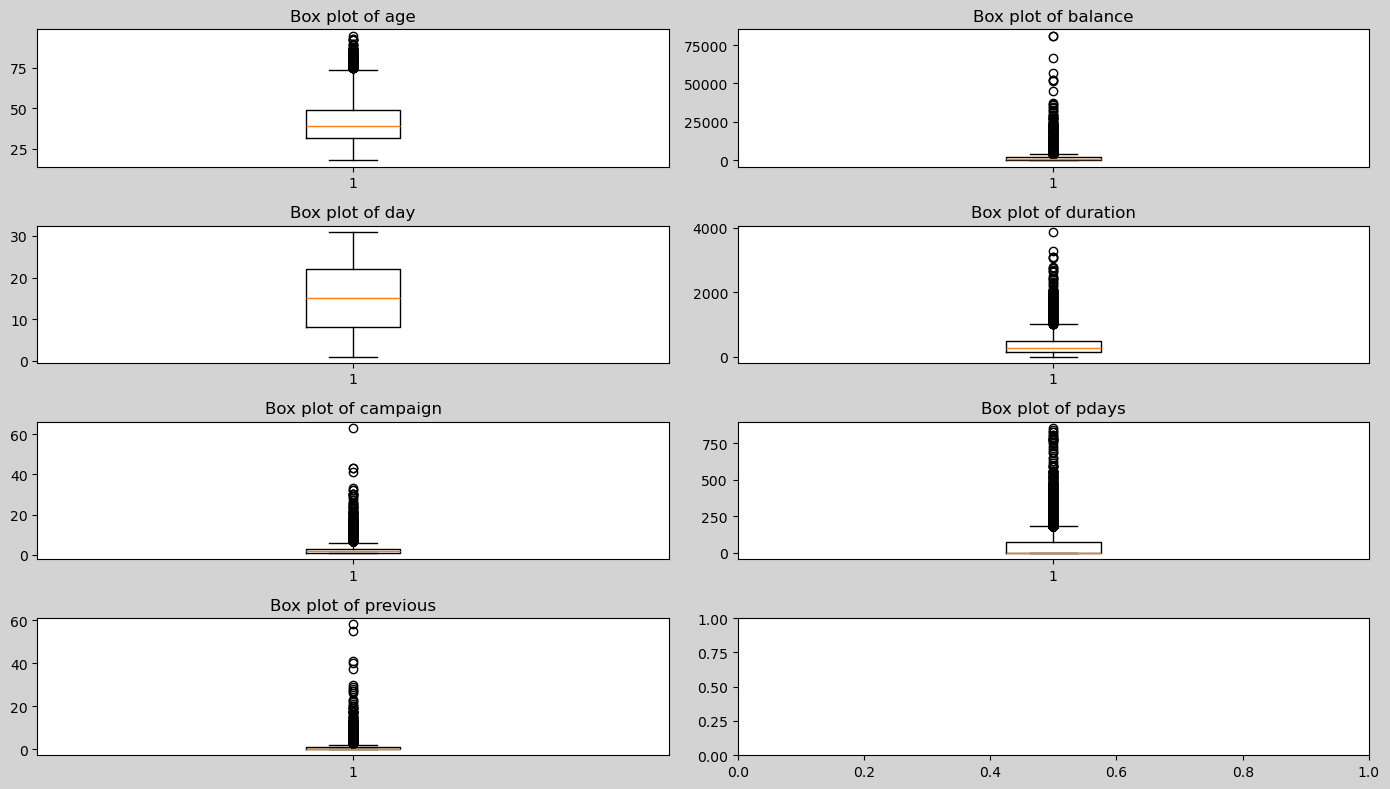

In [62]:
#numerical columns
columns = df.select_dtypes(include=['number']).columns

fig, axs = plt.subplots(4,2, figsize=(14, 8))
fig.set_facecolor('lightgrey')

axs = axs.flatten()

for i,column in enumerate(columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [63]:
# The equation of detecting and removing outliers 
#for col in numeric_columns:
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    Upper = Q3 + (1.5 * IQR)
#    Lower = Q1 - (1.5 * IQR)

#    Upper_outliers = df[df[col] > Upper].index
#    Lower_outliers = df[df[col] < Lower].index

#    df.drop(Upper_outliers, inplace=True)
#    df.drop(Lower_outliers, inplace=True)


We decided not to remove outliers as they affect the accuracy of our models

# EDA
Dive deeper into the cleaned data to uncover patterns, relationships, and trends.

## Univariate 
where we examine each variable individually. The primary goal is to summarize and understand the distribution, central tendency, and variability of a single variable in isolation

### Plotting categorical feature

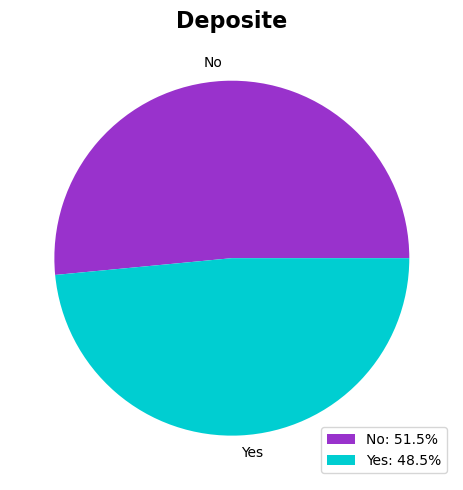

In [70]:
#visualize the target variable deposit

counts = df['deposit'].value_counts()

colors = ['#9932CC','#00CED1']  

labels=['No','Yes']

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(5,5))  
plt.pie(counts, labels=labels,colors = colors)

# Add a title
plt.title('Deposite', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()


We can see that the dataset is approximatley balanced

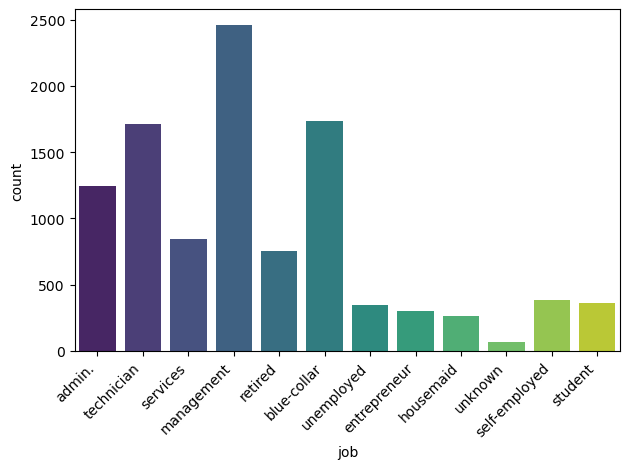

In [73]:
#plotting job column
sns.countplot(x ='job',hue='job', data = df,palette='viridis')
plt.xticks(rotation=45, ha='right')  #rotate by 45 degrees and align labels to the right
plt.tight_layout()
plt.show()

we can see the most dominant job is managment 

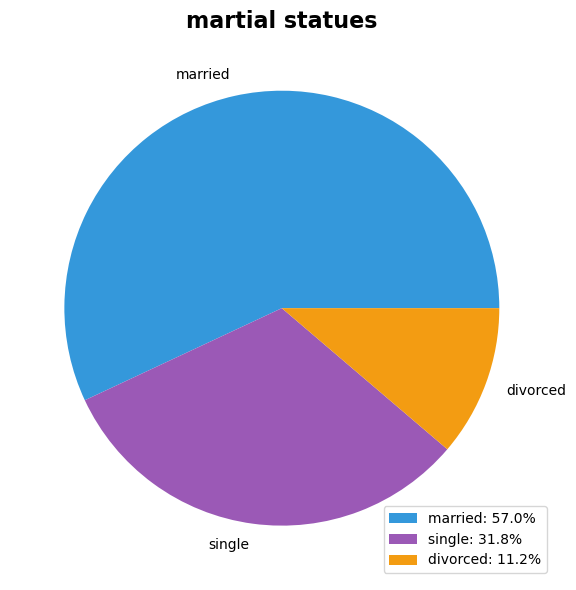

In [76]:
#visualize the marital statues feature

counts = df['marital'].value_counts()

colors = ['#3498DB','#9B59B6','#F39C12']  

labels = counts.index.tolist()

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(6,6))  
plt.pie(counts, labels=labels,colors = colors)

plt.title('martial statues', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()


We can see the highest population is married

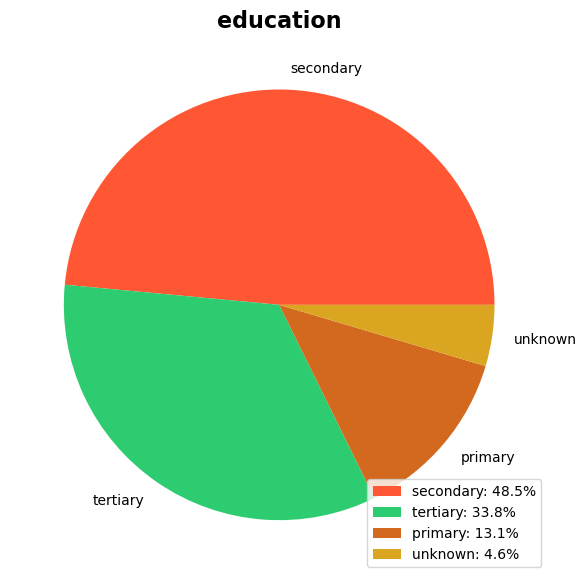

In [79]:
#visualize the education feature

counts = df['education'].value_counts()

colors = ['#FF5733','#2ECC71','#D2691E','#DAA520']  

labels = counts.index.tolist()

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(6,6))  
plt.pie(counts, labels=labels,colors = colors)

plt.title('education', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()


The most education type is tertiary

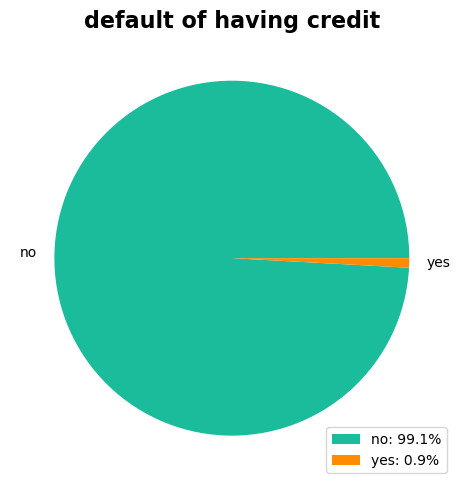

In [82]:
#plotting default of having a credit feature
counts = df['default'].value_counts()

colors = ['#1ABC9C','#FF8C00']  

labels = counts.index.tolist()

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(5,5))  
plt.pie(counts, labels=labels,colors = colors)

plt.title('default of having credit', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()


We can see most clients dont have credit

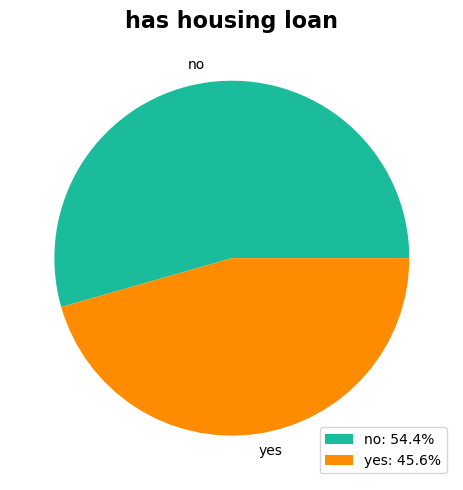

In [85]:
#plotting housing of having a loan  feature
counts = df['housing'].value_counts()

colors = ['#1ABC9C','#FF8C00']  

labels = counts.index.tolist()

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(5,5))  
plt.pie(counts, labels=labels,colors = colors)

plt.title('has housing loan', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()


Most clients dont have housing loan

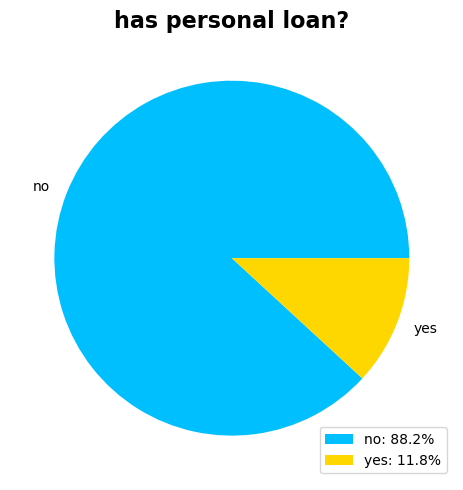

In [88]:
#plotting housing of having personal loan feature
counts = df['loan'].value_counts()

colors = ['#00BFFF','#FFD700']  

labels = counts.index.tolist()

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(5,5))  
plt.pie(counts, labels=labels,colors = colors)

plt.title('has personal loan?', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()

Most clients dont have personal loan

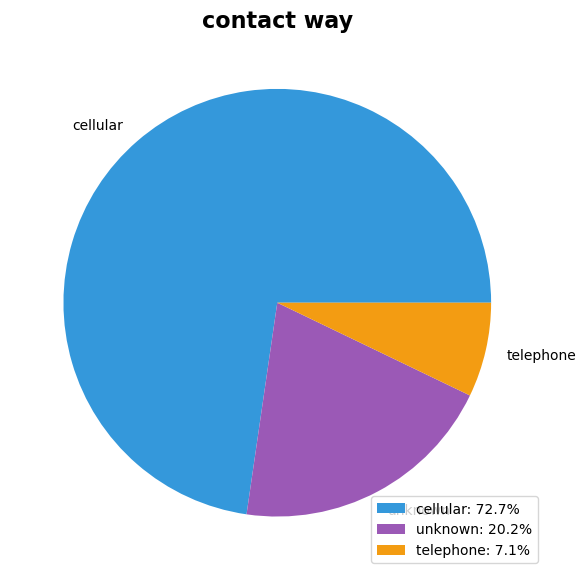

In [91]:
#visualize the contact feature

counts = df['contact'].value_counts()

colors = ['#3498DB','#9B59B6','#F39C12']  

labels = counts.index.tolist()

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(6,6))  
plt.pie(counts, labels=labels,colors = colors)

plt.title('contact way', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()


The most way of contacting with clients is through cellular way

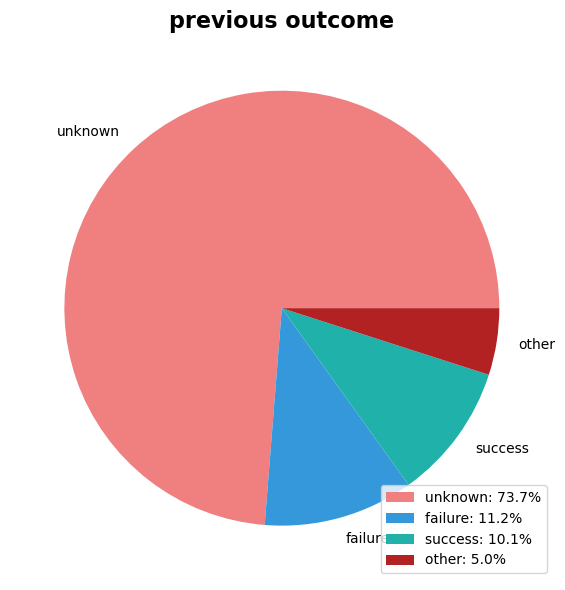

In [94]:
#visualize the poutcome feature

counts = df['poutcome'].value_counts()

colors = ['#F08080','#3498DB','#20B2AA','#B22222']  

labels = counts.index.tolist()

percentages = [(count / counts.sum()) * 100 for count in counts]

#plot the pie chart
plt.figure(figsize=(6,6))  
plt.pie(counts, labels=labels,colors = colors)

plt.title('previous outcome', fontsize=16, fontweight='bold')
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, loc='lower right')
plt.tight_layout()
plt.show()


Most outcome of the previous marketing campaign are unknowns

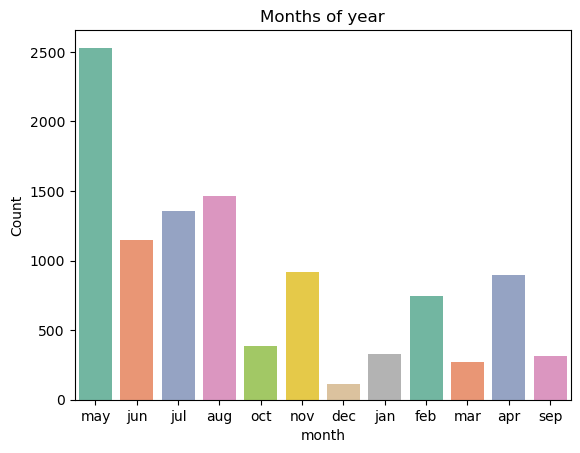

In [97]:
#plotting month feature
sns.countplot(x='month', data=df,hue='month' ,palette='Set2')
plt.title('Months of year')
plt.xlabel('month')
plt.ylabel('Count')
plt.show()

The most Last contact month of year is may

### Plotting numeric data

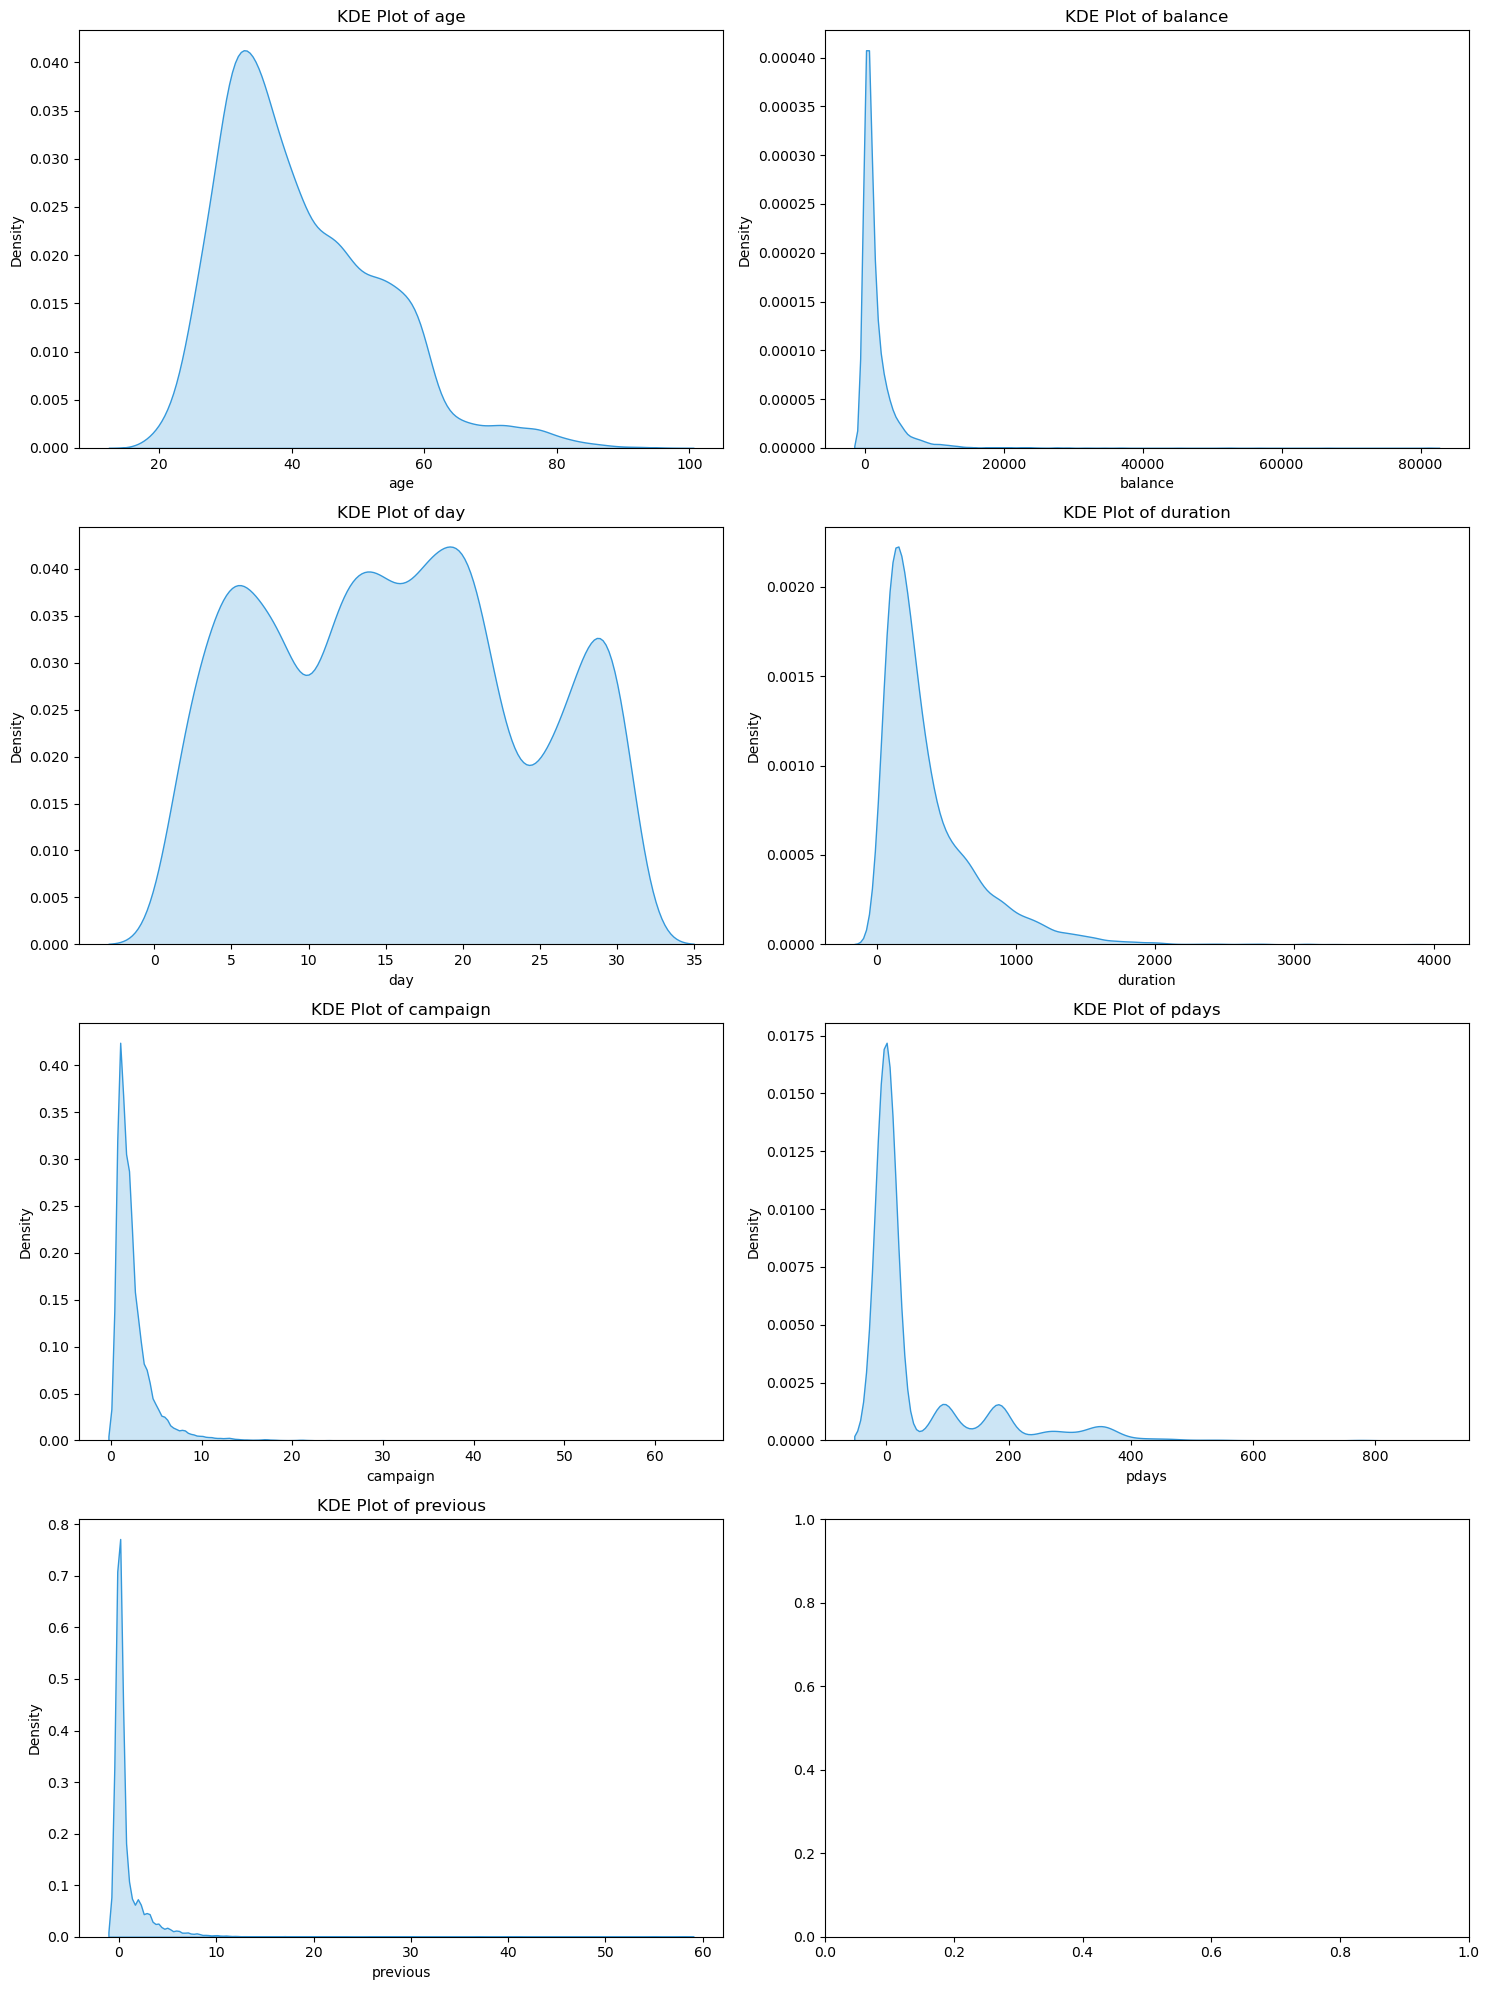

In [101]:
fig, axes = plt.subplots(4,2, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, fill=True, color='#3498DB', ax=axes[i])
    axes[i].set_title(f'KDE Plot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


* The most values of age of clients are between 35 to 45, This suggests that the majority of the observations involve middle-aged individuals.
* The most values of balance is between 500 to 1000, This suggests that the majority of people have low balances.
* There is no clear trend, suggesting no particular day of the month dominates the dataset.
* Most call durations are short below 500 secondes, A majority of interactions involve short durations.
* Most values of number of contacts performed during this campaign concentrated between 1 and 5.This suggests that most customers were contacted only a few times during the campaign.
* Number of days that passed by after the client was last contacted from a previous campaign are small.
* Number of contacts performed before this campaign  is small.

## Bivariate Analysis:
It statistical analysis of two variables to explore their relationship, correlation, or association. 

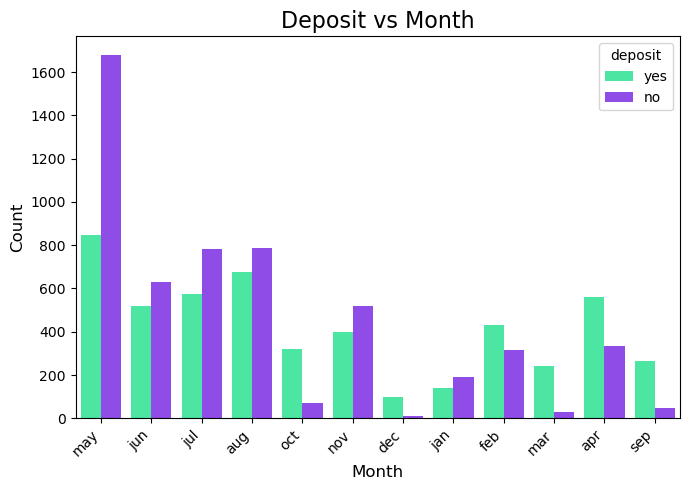

In [105]:
#Between deposit and month
plt.figure(figsize=(7, 5))  
sns.countplot(x='month', hue='deposit', data = df,palette=['#33FFA5','#8C33FF'])

plt.title("Deposit vs Month", fontsize=16)  
plt.xlabel("Month", fontsize=12)  
plt.ylabel("Count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* The highest months when people make deposits are September,Octuber, February and April

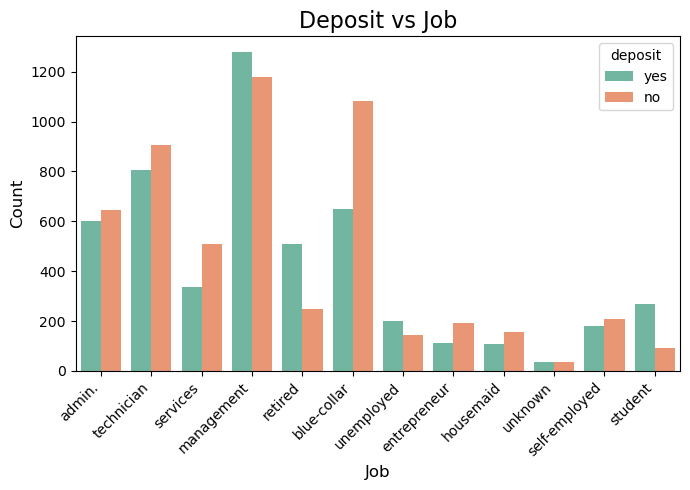

In [108]:
#Between deposit and job
plt.figure(figsize=(7, 5))  
sns.countplot(x='job', hue='deposit',data=df ,palette='Set2')  
plt.title("Deposit vs Job", fontsize=16)  
plt.xlabel("Job", fontsize=12)  
plt.ylabel("Count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* Retired and Students are the groups most likely to make deposits (1).
* Blue-collar and Services jobs tend to show more non-deposits (0).

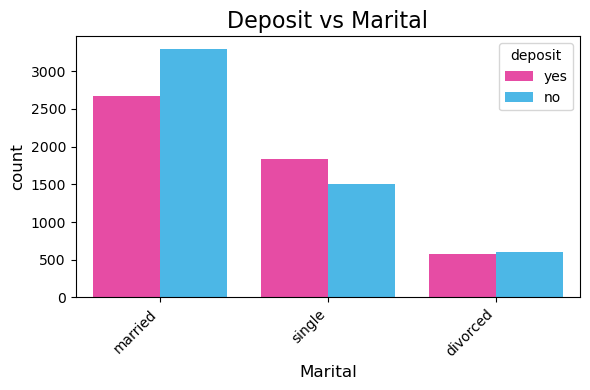

In [111]:
#Between deposit and marital
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='marital',  hue='deposit', palette=['#FF33A8', '#33C1FF'])  
plt.title("Deposit vs Marital", fontsize=16)  
plt.xlabel("Marital", fontsize=12)  
plt.ylabel("count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* Married couples might pool their resources, leading to higher savings and deposit amounts.
* But comparing all the married couples seems like maried couples dont make deposits as when comparing to single customers it seems like single customers have higher probability to make deposits
* Divorced individuals show a neutral trend, with deposits and non-deposits being very close.

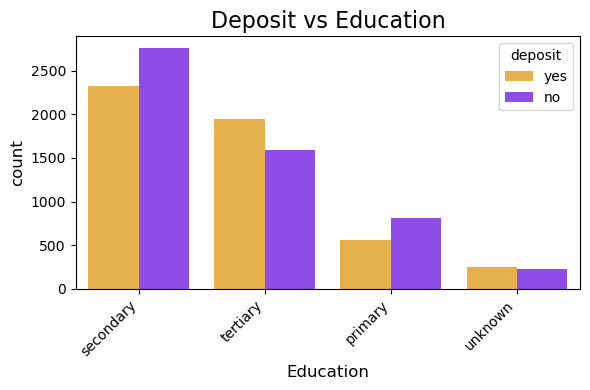

In [114]:
#Between deposit and education
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='education', hue='deposit',palette=['#FFB833','#8C33FF'])
plt.title("Deposit vs Education", fontsize=16)  
plt.xlabel("Education", fontsize=12)  
plt.ylabel("count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* People with tertiary education are more likely to make deposits.
* Individuals with secondary education have the largest population but tend not to make deposits.
* Primary education individuals show minimal engagement with deposits.
* This highlights a potential positive relationship between higher education levels (tertiary) and the likelihood of making deposits.

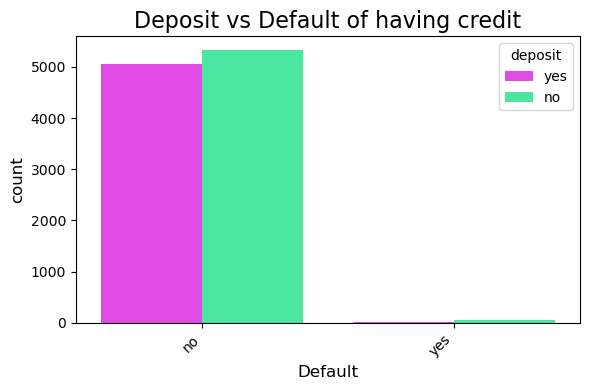

In [117]:
#Between deposit and defualt
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='default', hue='deposit', palette=['#F933FF','#33FFA5'])
plt.title("Deposit vs Default of having credit", fontsize=16)  
plt.xlabel("Default", fontsize=12)  
plt.ylabel("count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* Individuals who have their credit are more likely to have deposits

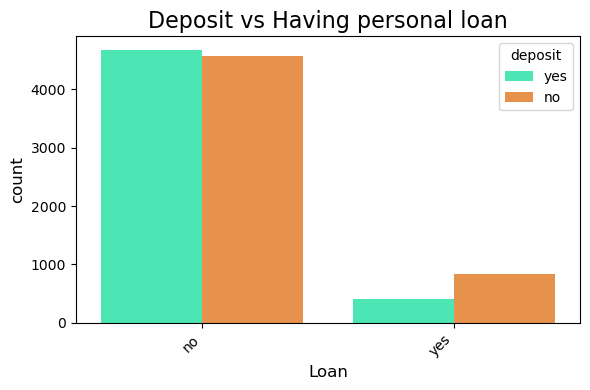

In [120]:
#Between deposit and loan
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='loan', hue='deposit', palette=['#33FFBD','#FF8F33'])
plt.title("Deposit vs Having personal loan", fontsize=16)  
plt.xlabel("Loan", fontsize=12)  
plt.ylabel("count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* Individuals with personal loans might be experiencing some level of financial strain, which could impact their ability to have deposits.

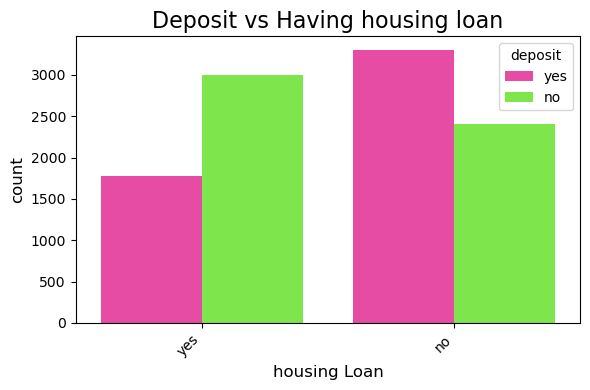

In [123]:
#Between deposit and housing loan
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='housing', hue='deposit', palette=['#FF33A8','#75FF33'])
plt.title("Deposit vs Having housing loan", fontsize=16)  
plt.xlabel("housing Loan", fontsize=12)  
plt.ylabel("count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* Individuals with housing loans might be experiencing some level of financial strain, which could impact their ability to have deposits.

* Individuals without are more likely to have deposits

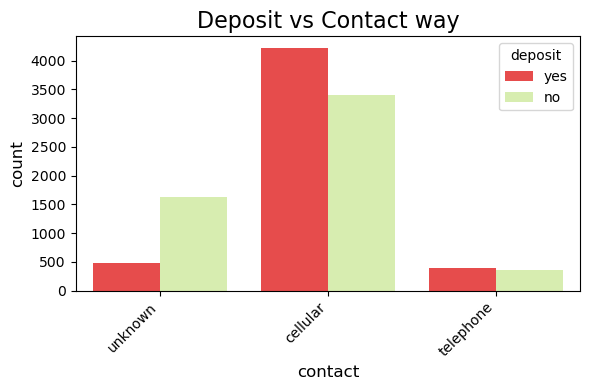

In [126]:
#Between deposit and contact
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='contact', hue='deposit', palette=['#FF3333','#DAF7A6'])
plt.title("Deposit vs Contact way", fontsize=16)  
plt.xlabel("contact", fontsize=12)  
plt.ylabel("count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* Cellular communication is likely more to make deposits to telephone calls.

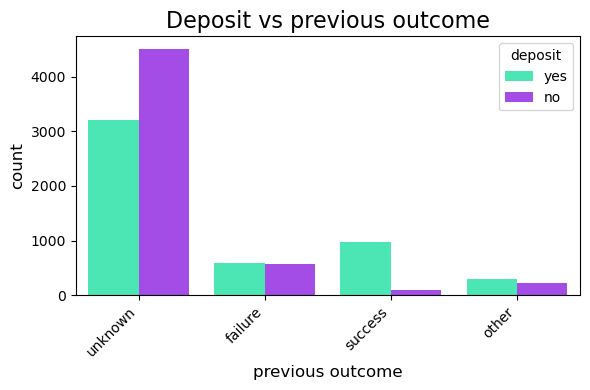

In [129]:
#Between deposit and poutcome
plt.figure(figsize=(6, 4))  
sns.countplot(data=df, x='poutcome',  hue='deposit', palette=['#33FFBD','#A833FF'])
plt.title("Deposit vs previous outcome", fontsize=16)  
plt.xlabel("previous outcome", fontsize=12)  
plt.ylabel("count", fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

* Previous success might boost customer confidence and increase their likelihood of making a deposit.

* Unknown outcomes might create a sense of curiosity.

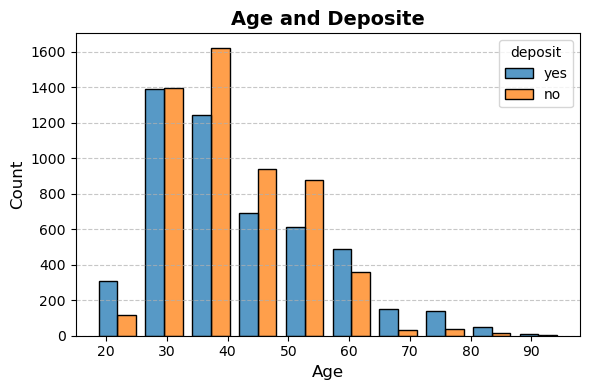

In [132]:
plt.figure(figsize=(6, 4))  

sns.histplot(data=df, x='age', hue='deposit', multiple='dodge', bins=10, shrink=0.8)
plt.title("Age and Deposite", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

* With increasing age probability of having a deposit increase.
*  Individuals in the 30-40 age group might have established careers and greater financial responsibility, leading to deposit amounts.
*  But the olders who make deposits are more than the olders who dont

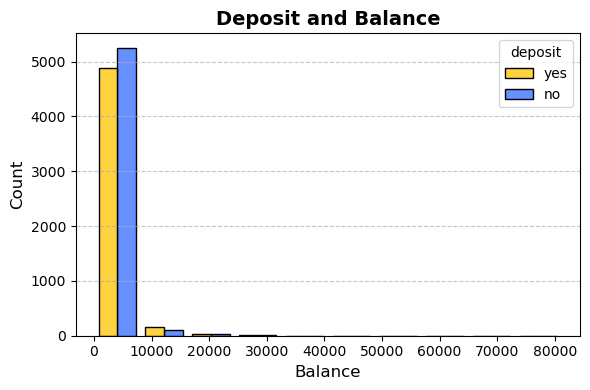

In [135]:
plt.figure(figsize=(6, 4))  

sns.histplot(data=df, x='balance', hue='deposit', multiple='dodge', bins=10, shrink=0.8,palette=['#FFC300','#336BFF'])
plt.title("Deposit and Balance", fontsize=14, fontweight='bold')
plt.xlabel("Balance", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

* The majority of deposits are concentrated in the lower balance ranges (below 10,000).
* Higher balances might be associated with a higher likelihood of having a deposit.

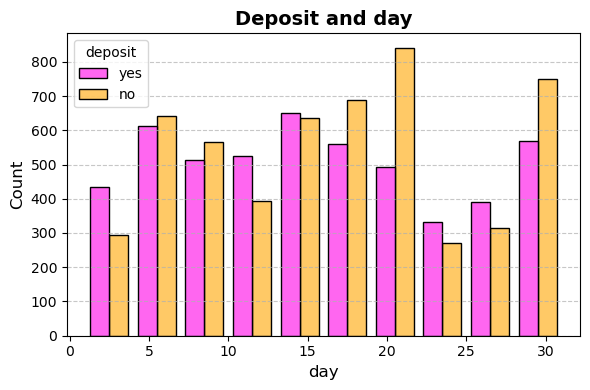

In [138]:
plt.figure(figsize=(6, 4))  

sns.histplot(data=df, x='day', hue='deposit', multiple='dodge', bins=10, shrink=0.8,palette=['#FF33EC', '#FFB833'])
plt.title("Deposit and day", fontsize=14, fontweight='bold')
plt.xlabel("day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

* The highest number of not making deposits seem to occur around the 20th day of the month.
* At the begining of the month its most likely to make deposits

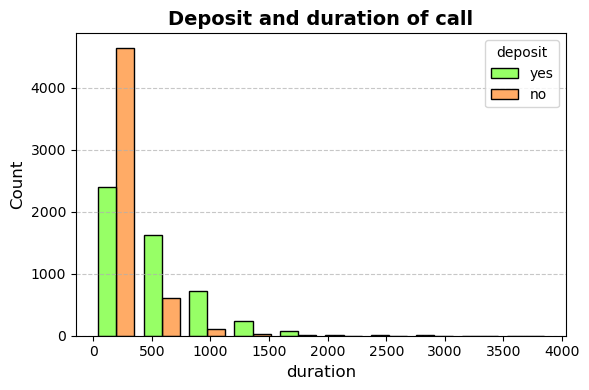

In [141]:
plt.figure(figsize=(6, 4))  

sns.histplot(data=df, x='duration', hue='deposit', multiple='dodge', bins=10, shrink=0.8,palette=['#75FF33', '#FF8F33'])
plt.title("Deposit and duration of call", fontsize=14, fontweight='bold')
plt.xlabel("duration", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

* with increasing the duration call its more likely to make deposits

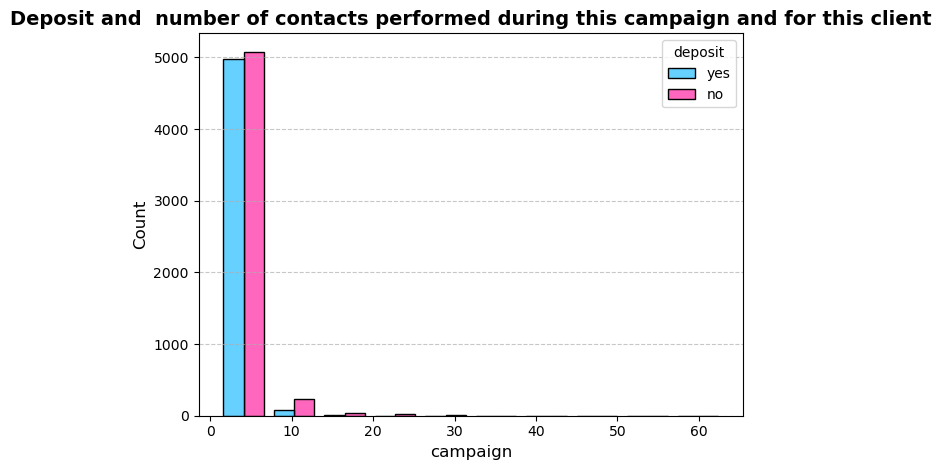

In [144]:
sns.histplot(data=df, x='campaign', hue='deposit', multiple='dodge', bins=10, shrink=0.8,palette=['#33C1FF', '#FF33A8'])
plt.title("Deposit and  number of contacts performed during this campaign and for this client", fontsize=14, fontweight='bold')
plt.xlabel("campaign", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

* The number of contact seems not to affect making deposits

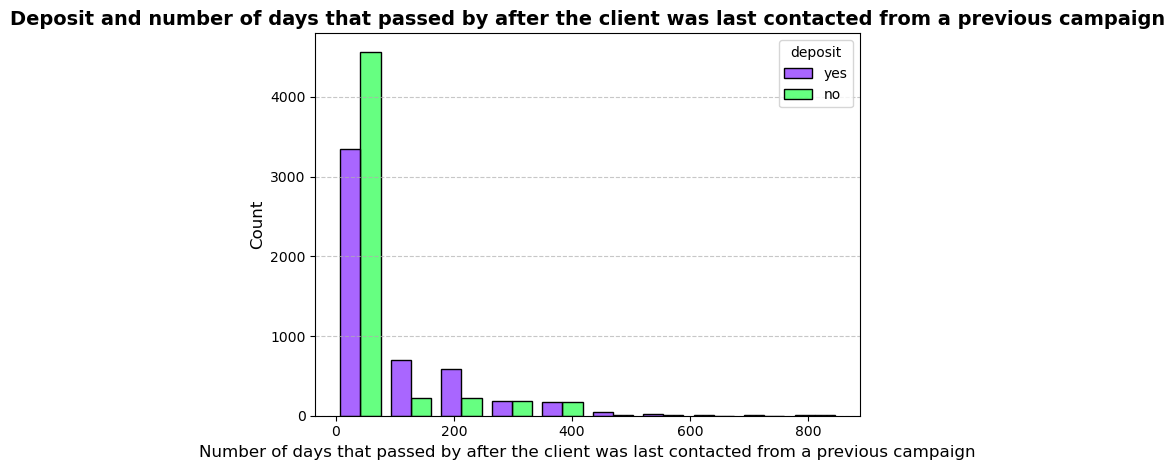

In [147]:
sns.histplot(data=df, x='pdays',  hue='deposit', multiple='dodge', bins=10, shrink=0.8,palette=['#8C33FF', '#33FF57'])
plt.title("Deposit and number of days that passed by after the client was last contacted from a previous campaign", fontsize=14, fontweight='bold')
plt.xlabel("Number of days that passed by after the client was last contacted from a previous campaign", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

* As increasing number of days that passed by after the client was last contacted from a previous campaign the probability with increasing deposits increases as maybe they took somedays to think about it

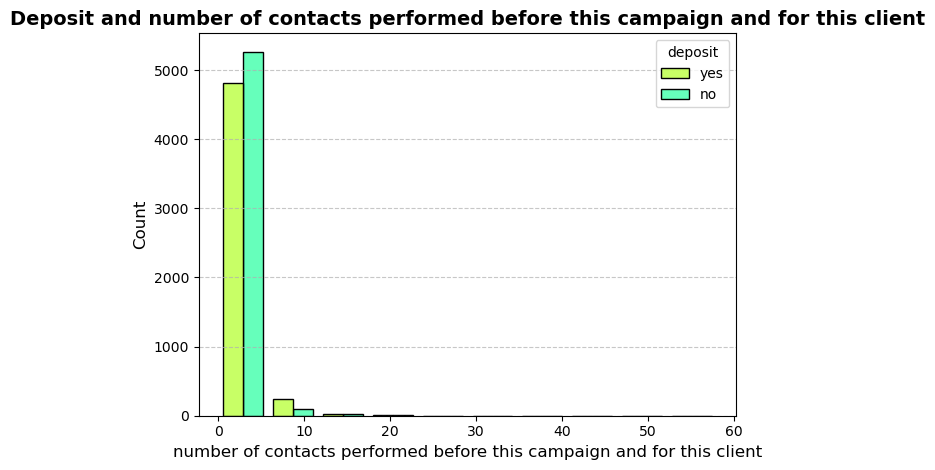

In [150]:
sns.histplot(data=df, x='previous',  hue='deposit', multiple='dodge', bins=10, shrink=0.8,palette=['#B6FF33', '#33FFA5'])
plt.title("Deposit and number of contacts performed before this campaign and for this client", fontsize=14, fontweight='bold')
plt.xlabel("number of contacts performed before this campaign and for this client", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

* Number of contacts performed before this campaign and for this client as they increase, they seem not to have affect on the decision

## Analysis(conclusion):
* Job: We can see the highest 2 populations who make deposits are students and retiered.
* Marital state: most people making deposits in married population but being single its probability of making deposit is higher.
* Education: Being Tertiary educated its likelyhood of having probability is high. 
* default: being in the population of haing by default credit card is. 
* Loan: having a loan makes a customer to not make a deposit.
* Housing loan: having a housing loan makes a person to not make a deposit and vice versa.
* Contact way: Contacting through cellular makes the likelyhood of person making deposit is high.
* Previous output: The population that its previous output is success has higher probability of making a deposit. 
* Age: being in 20s or more than 55 has greater probability of making deposit. 
* Month: Making deposits in september,octuber, february and April is high.
* Balance: Having large balance has probability of making deposit.
* Days: being in the begining of month has high probability of making deposit.
* Duration: long duration calls has high probability of making deposit.
* Campaign: Number of contacts performed during this campaign and for this client  has no effect.
* Pdays: Number of days that passed by after the client was last contacted from a previous campaign when they increse, the probability of making deposit increase
* previous: number of contacts performed before this campaign and for this client has no effect.


# Machine learning models

# KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [158]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [160]:
print("Columns used in the KNN model:", X_train.columns)


Columns used in the KNN model: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [162]:
y_pred = knn.predict(X_test_scaled)

In [164]:
# model evaluation
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on Test Set: 0.8066825775656324

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82      1081
           1       0.82      0.77      0.79      1014

    accuracy                           0.81      2095
   macro avg       0.81      0.81      0.81      2095
weighted avg       0.81      0.81      0.81      2095

Confusion Matrix:
 [[912 169]
 [236 778]]


As the number of cross-validation folds (CV) increases, the accuracy improves, while a decrease in accuracy is observed when CV is lower.

In [167]:
#adjust hyperparameter  
param_grid = {'n_neighbors': np.arange(1, 21)} 
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

Select the optimal value for k (the number of neighbors)

In [170]:
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best k: {best_k}, Best Cross-Validation Accuracy: {best_score:.4f}")


Best k: 13, Best Cross-Validation Accuracy: 0.8099


In [172]:
# find best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=13)

By adjusting the hyperparameters with various values, the accuracy of the test data increased, and the confusion matrix values showed better results.

In [175]:
#  model evaluation 
# change the value of the k and made it k=13(find the best k)
(best_k)
y_pred_best = knn_best.predict(X_test_scaled)
print("\nFinal Evaluation with Best k:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Final Evaluation with Best k:
Accuracy on Test Set: 0.8105011933174224

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1081
           1       0.83      0.76      0.80      1014

    accuracy                           0.81      2095
   macro avg       0.81      0.81      0.81      2095
weighted avg       0.81      0.81      0.81      2095

Confusion Matrix:
 [[924 157]
 [240 774]]


In [177]:
k_values = np.arange(1, 21)
accuracies = []


In [179]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))


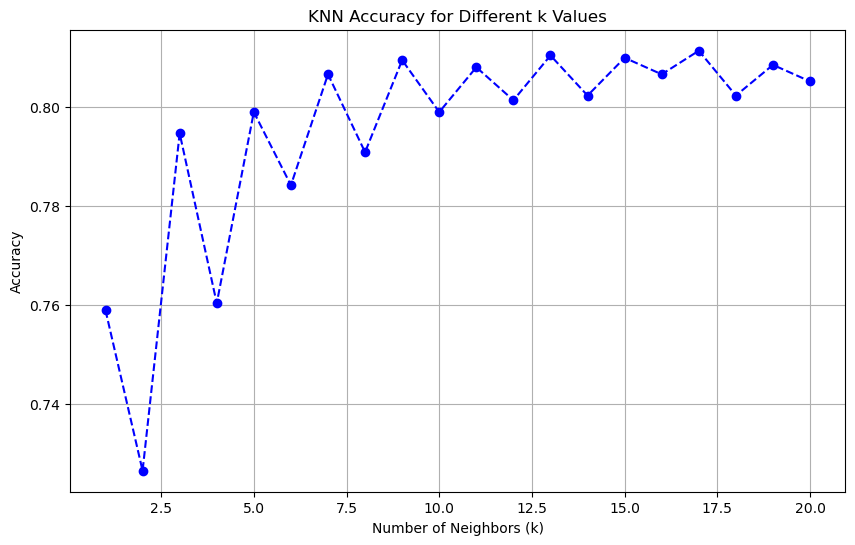

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [181]:

train_accuracy = knn_best.score(X_train_scaled, y_train)
print("Accuracy on Training Set:", train_accuracy)


test_accuracy = knn_best.score(X_test_scaled, y_test)
print("Accuracy on Test Set:", test_accuracy)


Accuracy on Training Set: 0.8387635756056808
Accuracy on Test Set: 0.8105011933174224


Manhattan, Chebyshev, Minkowski, and Euclidean distances each emphasize different feature relationships: Manhattan sums absolute differences, Chebyshev considers the maximum difference, Minkowski generalizes both, and Euclidean calculates straight-line distance. Testing these metrics helps identify the one that best aligns with the data structure and improves model accuracy.

In [186]:
# Euclidean distance is set as defult in scikit-learn 
default_metric = 'euclidean'


distance_metrics = [default_metric, 'manhattan', 'chebyshev', 'minkowski']  #build in function use scikit-learn
# for data storage
accuracy_results_train = {} 
accuracy_results_test = {}  


A simple for loop iterates through different distance types to compute the training and testing accuracy, as well as precision, recall, F1-score, and the confusion matrix for the test data.

In [189]:
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric} distance:")
    knn_with_metric = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn_with_metric.fit(X_train_scaled, y_train)
    
    # Predict training data
    y_train_pred = knn_with_metric.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred) #Compare predicted by actual
    accuracy_results_train[metric] = train_accuracy
    print(f"Accuracy on Training Set using {metric}: {train_accuracy:.4f}")

    # Predict  test data
    y_test_pred = knn_with_metric.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_results_test[metric] = test_accuracy
    print(f"Accuracy on Test Set using {metric}: {test_accuracy:.4f}")
    

    print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))



Evaluating KNN with euclidean distance:
Accuracy on Training Set using euclidean: 0.8388
Accuracy on Test Set using euclidean: 0.8105

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1081
           1       0.83      0.76      0.80      1014

    accuracy                           0.81      2095
   macro avg       0.81      0.81      0.81      2095
weighted avg       0.81      0.81      0.81      2095

Confusion Matrix (Test Data):
 [[924 157]
 [240 774]]

Evaluating KNN with manhattan distance:
Accuracy on Training Set using manhattan: 0.8305
Accuracy on Test Set using manhattan: 0.7905

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.76      0.86      0.81      1081
           1       0.83      0.72      0.77      1014

    accuracy                           0.79      2095
   macro avg       0.80      0.79      0.79      2095
wei

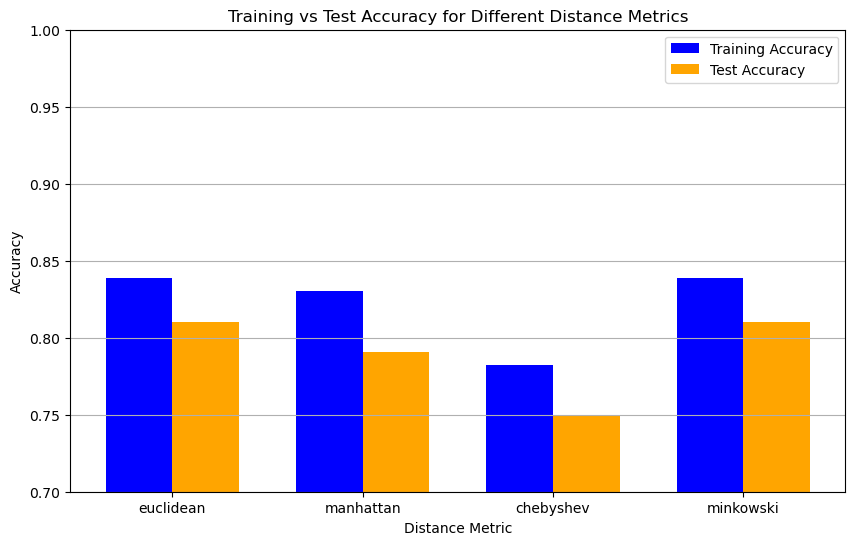


Best distance metric for Test Data: euclidean with accuracy: 0.8105
Best distance metric for Training Data: euclidean with accuracy: 0.8388


In [190]:
metrics = np.arange(len(distance_metrics))
width = 0.35  

plt.figure(figsize=(10, 6))
plt.bar(metrics - width/2, accuracy_results_train.values(), width, label='Training Accuracy', color='blue')
plt.bar(metrics + width/2, accuracy_results_test.values(), width, label='Test Accuracy', color='orange')

plt.title('Training vs Test Accuracy for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.xticks(metrics, distance_metrics)
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(axis='y')
plt.show()

# Print the best distance metric for test data
best_distance_metric_test = max(accuracy_results_test, key=accuracy_results_test.get)
print(f"\nBest distance metric for Test Data: {best_distance_metric_test} with accuracy: {accuracy_results_test[best_distance_metric_test]:.4f}")

# Print the best distance metric for training data
best_distance_metric_train = max(accuracy_results_train, key=accuracy_results_train.get)
print(f"Best distance metric for Training Data: {best_distance_metric_train} with accuracy: {accuracy_results_train[best_distance_metric_train]:.4f}")

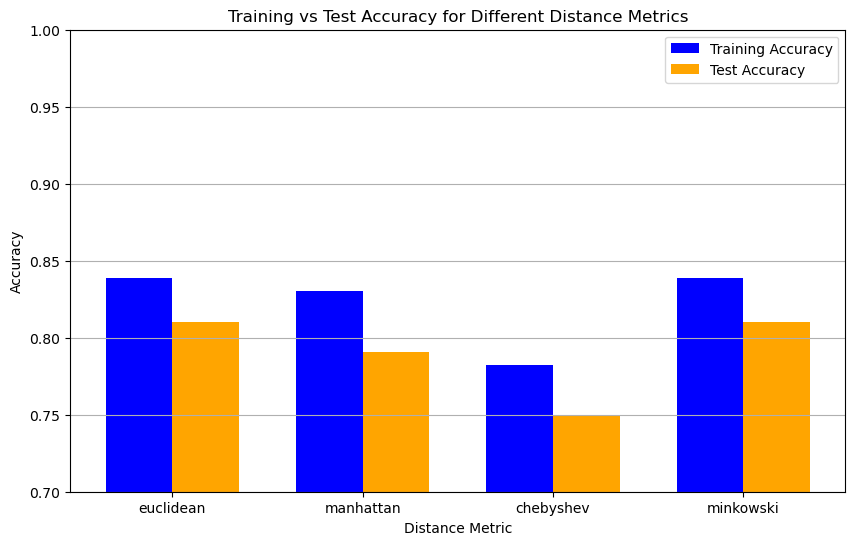


Best distance metric for Test Data: euclidean with accuracy: 0.8105
Best distance metric for Training Data: euclidean with accuracy: 0.8388


In [124]:
metrics = np.arange(len(distance_metrics))
width = 0.35  

plt.figure(figsize=(10, 6))
plt.bar(metrics - width/2, accuracy_results_train.values(), width, label='Training Accuracy', color='blue')
plt.bar(metrics + width/2, accuracy_results_test.values(), width, label='Test Accuracy', color='orange')

plt.title('Training vs Test Accuracy for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.xticks(metrics, distance_metrics)
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(axis='y')
plt.show()

# Print the best distance metric for test data
best_distance_metric_test = max(accuracy_results_test, key=accuracy_results_test.get)
print(f"\nBest distance metric for Test Data: {best_distance_metric_test} with accuracy: {accuracy_results_test[best_distance_metric_test]:.4f}")

# Print the best distance metric for training data
best_distance_metric_train = max(accuracy_results_train, key=accuracy_results_train.get)
print(f"Best distance metric for Training Data: {best_distance_metric_train} with accuracy: {accuracy_results_train[best_distance_metric_train]:.4f}")

In [199]:
new_data = pd.DataFrame({
    'age':[70], 
    'job':['retired'], 
    'marital':['single'],
    'education':['tertiary'], 
    'default':['yes'], 
    'balance':[10000], 
    'housing':['yes'],
    'loan':['no'], 
    'contact':['cellular'], 
    'day':[3], 
    'month':['april'], 
    'duration':[1000], 
    'campaign':[200], 
    'pdays':[220],
    'previous':[22],
    'poutcome':['success']
})

In [287]:
new_data_scaled = encoder_scaler.transform(new_data)
predicted_class = knn_best.predict(new_data_scaled)
print("Predicted class:", predicted_class[0])


Predicted class: 0


# SVM

In [204]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [206]:
#Define and train an initial SVM model
print("Training initial SVM model...")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

Training initial SVM model...


SVC(random_state=42)

In [208]:
#Define and train an initial SVM model
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)

print("\nInitial Model Evaluation:")
print(f"Accuracy on training set: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


Initial Model Evaluation:
Accuracy on training set: 0.8730
Accuracy on test set: 0.8501

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1081
           1       0.83      0.88      0.85      1014

    accuracy                           0.85      2095
   macro avg       0.85      0.85      0.85      2095
weighted avg       0.85      0.85      0.85      2095



In [210]:
#Experiment with different kernel functions
print("\nEvaluating different kernel functions...")
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    y_pred_test = svm_model.predict(X_test_scaled)
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")


Evaluating different kernel functions...

Kernel: linear
Accuracy: 0.8272

Kernel: poly
Accuracy: 0.8554

Kernel: rbf
Accuracy: 0.8501

Kernel: sigmoid
Accuracy: 0.7026


In [212]:
 #Hyperparameter tuning with GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Parameter grid
param_grid = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X, y)

print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters from GridSearchCV:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [218]:
#Train and evaluate the tuned model
print("\nTraining and evaluating the best model...")
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_scaled, y_train)
y_pred_test = best_svm_model.predict(X_test_scaled)

print("\nBest Model Evaluation:")
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_test):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Training and evaluating the best model...

Best Model Evaluation:
Accuracy on test set: 0.8286
Precision: 0.8366
Recall: 0.8028
F1-score: 0.8193

Confusion Matrix:
[[922 159]
 [200 814]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1081
           1       0.84      0.80      0.82      1014

    accuracy                           0.83      2095
   macro avg       0.83      0.83      0.83      2095
weighted avg       0.83      0.83      0.83      2095



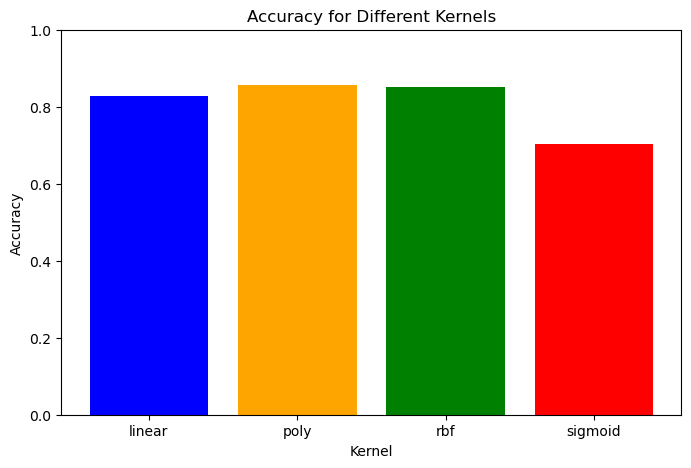

In [214]:
# Evaluate accuracy for different kernels
kernel_accuracies = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    y_pred_test = svm_model.predict(X_test_scaled)
    kernel_accuracies.append(accuracy_score(y_test, y_pred_test))

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(kernels, kernel_accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [222]:
predicted_class = best_svm_model.predict(new_data_scaled)
print("Predicted class:", predicted_class[0])


Predicted class: 0


# Naive Bayes

In [226]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [228]:
from sklearn.naive_bayes import GaussianNB

#  GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# prediction
y_pred = nb.predict(X_test_scaled)

# evaluation
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on Test Set: 0.722673031026253

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76      1081
           1       0.79      0.58      0.67      1014

    accuracy                           0.72      2095
   macro avg       0.74      0.72      0.72      2095
weighted avg       0.74      0.72      0.72      2095

Confusion Matrix:
 [[926 155]
 [426 588]]


* The model performs well for class 0, with good precision and recall. However, it underperforms for class 1, especially in terms of recall

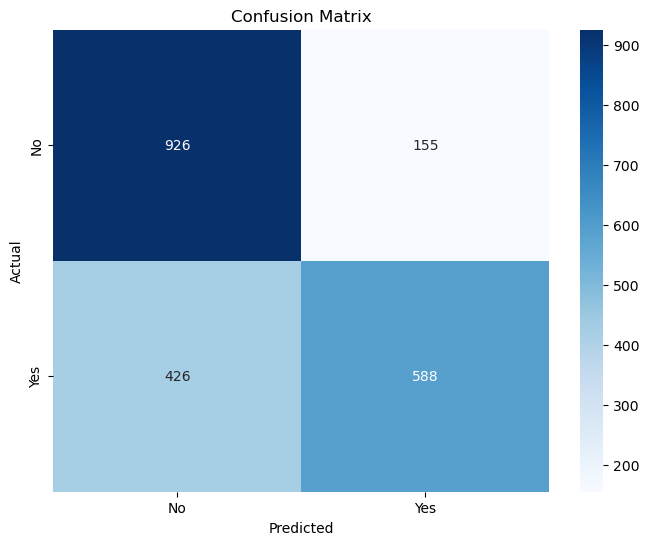

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [233]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

#  SMOTE 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Naive Bayes
nb_classifier = GaussianNB()

#  Cross-Validation & GaussianNB
cross_val_scores = cross_val_score(nb_classifier, X_train_res, y_train_res, cv=5)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")

Cross-Validation Accuracy: 0.7193


In [235]:
# Identifying errors in the data
false_positive = cm[0, 1]  # Cases that should have been "No" but were predicted as "Yes"
false_negative = cm[1, 0]  # Cases that should have been "Yes" but were predicted as "No"
print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")


False Positives: 155
False Negatives: 426


AUC Score: 0.7960


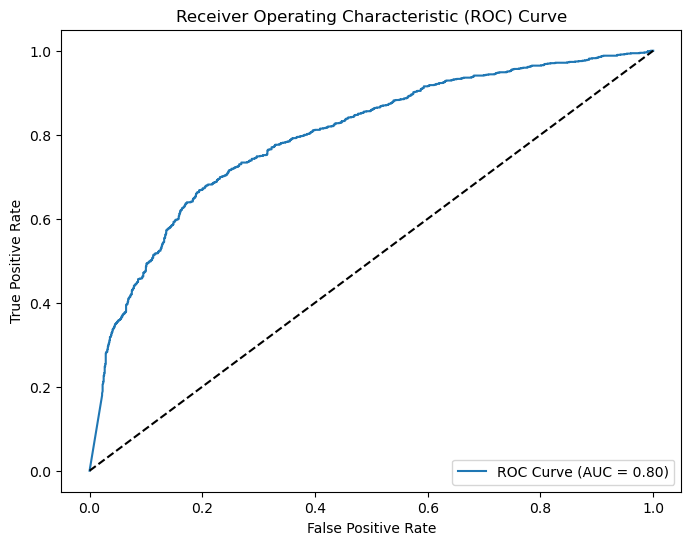

In [237]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC
y_prob = nb.predict_proba(X_test_scaled)[:, 1]  # Predicted probability for class 1
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [239]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Grid of smoothing parameters to search over
}

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_nb = grid_search.best_estimator_  # Best model based on grid search

# Evaluate the optimized model
y_pred_best = best_nb.predict(X_test_scaled)
print("\nOptimized GaussianNB Accuracy:", accuracy_score(y_test, y_pred_best))


Best parameters: {'var_smoothing': 1e-09}

Optimized GaussianNB Accuracy: 0.722673031026253


In [241]:
nb_classifier = GaussianNB(priors=[0.6, 0.4])  # Assigning different class weights (prior probabilities)
nb_classifier.fit(X_train_scaled, y_train)


GaussianNB(priors=[0.6, 0.4])

In [243]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Using GaussianNB with 10-fold cross-validation
nb_classifier = GaussianNB()

# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_train_scaled, y_train, cv=10)

# Display the mean and standard deviation
print(f"10-fold Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")
print(f"Standard Deviation: {cross_val_scores.std():.4f}")


10-fold Cross-Validation Accuracy: 0.7199
Standard Deviation: 0.0116


In [247]:
predicted_class = best_nb.predict(new_data_scaled)
print("Predicted class:", predicted_class[0])

Predicted class: 0


# Decision Tree
* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* Overfitting occurs when the model performs well on training data but generalizes poorly to unseen data.
* DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)est')


In [250]:
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.metrics import  classification_report, confusion_matrix,accuracy_score

#model with default parameter
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train_encoded, y_train)

y_test_pred = model.predict(X_test_encoded)

y_train_pred = model.predict(X_train_encoded)

print(f"Accuracy score of training data {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy score of testing data {accuracy_score(y_test,y_test_pred)}")


print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy score of training data 1.0
Accuracy score of testing data 0.7894988066825775
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1081
           1       0.79      0.77      0.78      1014

    accuracy                           0.79      2095
   macro avg       0.79      0.79      0.79      2095
weighted avg       0.79      0.79      0.79      2095



It obvious that there is overfitting, The next step is to try minimizing accuracy of training data and maximizing accuracy of testing data to overcome overfitting

Text(70.72222222222221, 0.5, 'Actual Labels')

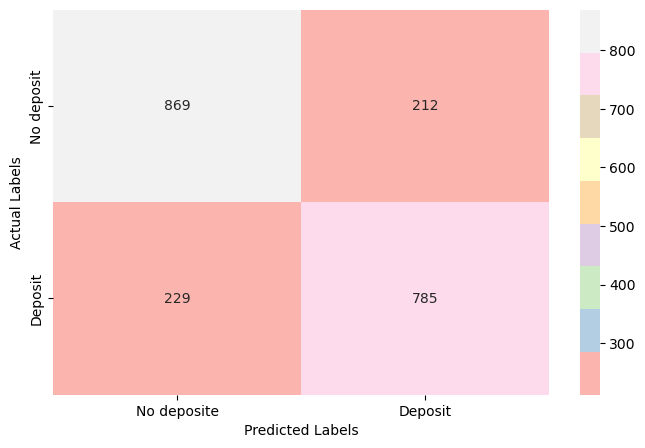

In [253]:
#visual confusion matrix
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=['No deposite', 'Deposit'], yticklabels=['No deposit', 'Deposit'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

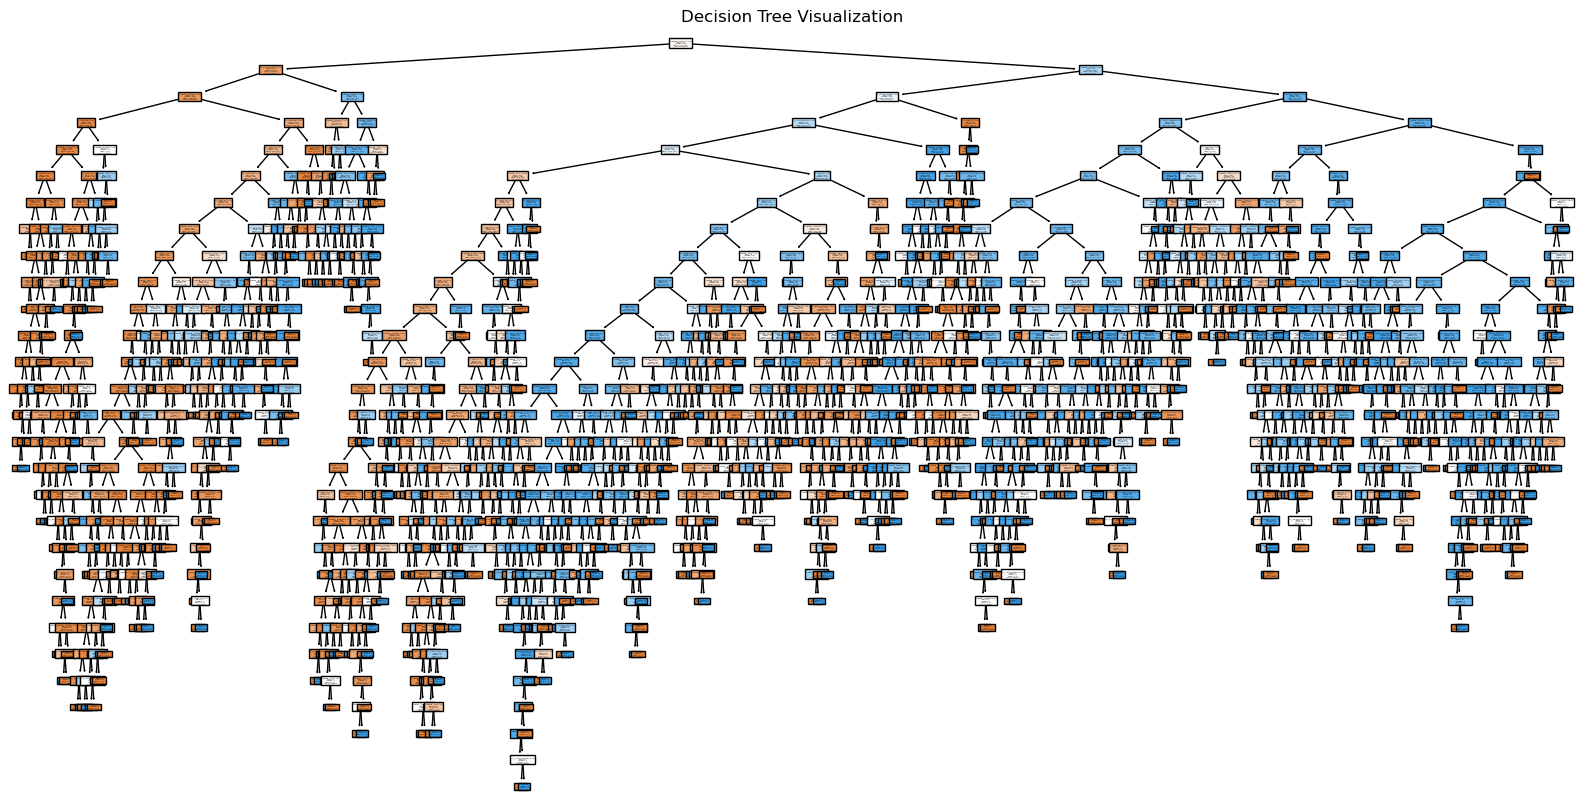

In [255]:
#Visualize the Decision Tree of default model
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=encoded_columns, class_names=['No Deposit', 'Deposit'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

We can see the tree is too much complex which is another proof of overfitting

In [257]:
#model with some hyperparameters to see their effect on the data
model2 = DecisionTreeClassifier(
    max_depth=10,           #limit tree depth
    min_samples_split=30,   #avoid small splits
    min_samples_leaf=50,    #prevent small leaf nodes
    criterion='entropy',       
    random_state=42,
)
model2.fit(X_train_encoded, y_train)

y_test_pred = model2.predict(X_test_encoded)

y_train_pred = model2.predict(X_train_encoded)

print(f"Accuracy score of training data {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy score of testing data {accuracy_score(y_test, y_test_pred)}")

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy score of training data 0.8318415085332379
Accuracy score of testing data 0.8119331742243436
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1081
           1       0.79      0.84      0.81      1014

    accuracy                           0.81      2095
   macro avg       0.81      0.81      0.81      2095
weighted avg       0.81      0.81      0.81      2095



This model is better than previous one, as testing accuracy has increased and overfitting is almost gone

Text(70.72222222222221, 0.5, 'Actual Labels')

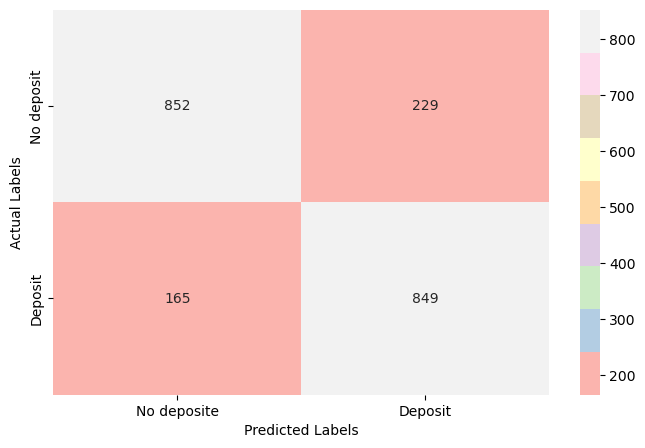

In [261]:
#visual confusion matrix
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=['No deposite', 'Deposit'], yticklabels=['No deposit', 'Deposit'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

The recall has increased as number of false negative has decreased
But precision has slightly decreased as number of false positive has slightly increased

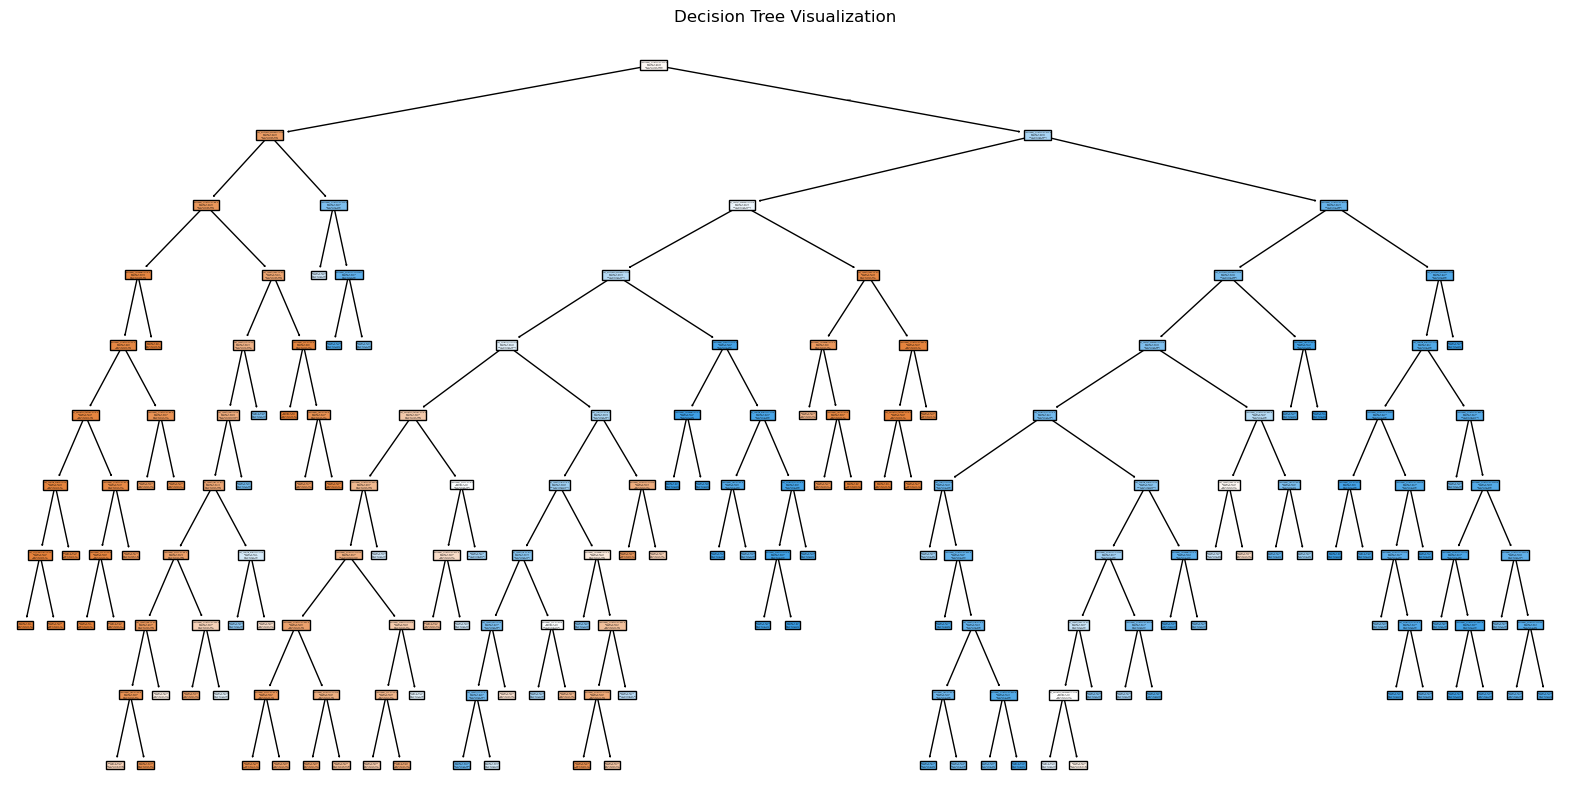

In [154]:
#Visualize the Decision Tree of model 2
plt.figure(figsize=(20, 10))
plot_tree(model2, feature_names=encoded_columns, class_names=['No Deposit', 'Deposit'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

This tree is much better than previous one because we changed the values of hyperparameters.
But maybe there are much better parameters than these so how to choose them with the huge number of combination of values of hyperparameter? this will lead us to optimization of model

In [263]:
#decision tree model with most important features of model 1
feature_importances = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

Feature Importances:
                      Feature  Importance
47       remainder__duration    0.329942
46            remainder__day    0.083361
27      cat__contact_unknown    0.072953
45        remainder__balance    0.066745
42     cat__poutcome_success    0.060996
44            remainder__age    0.060179
49          remainder__pdays    0.031469
48       remainder__campaign    0.028261
21           cat__housing_no    0.021994
31            cat__month_feb    0.014721
29            cat__month_aug    0.014208
36            cat__month_may    0.013324
35            cat__month_mar    0.012766
38            cat__month_oct    0.012010
24             cat__loan_yes    0.011936
28            cat__month_apr    0.011633
37            cat__month_nov    0.011301
50       remainder__previous    0.009925
32            cat__month_jan    0.008088
1       cat__job_blue-collar    0.007370
33            cat__month_jul    0.007256
34            cat__month_jun    0.007193
7          cat__job_services    0.0

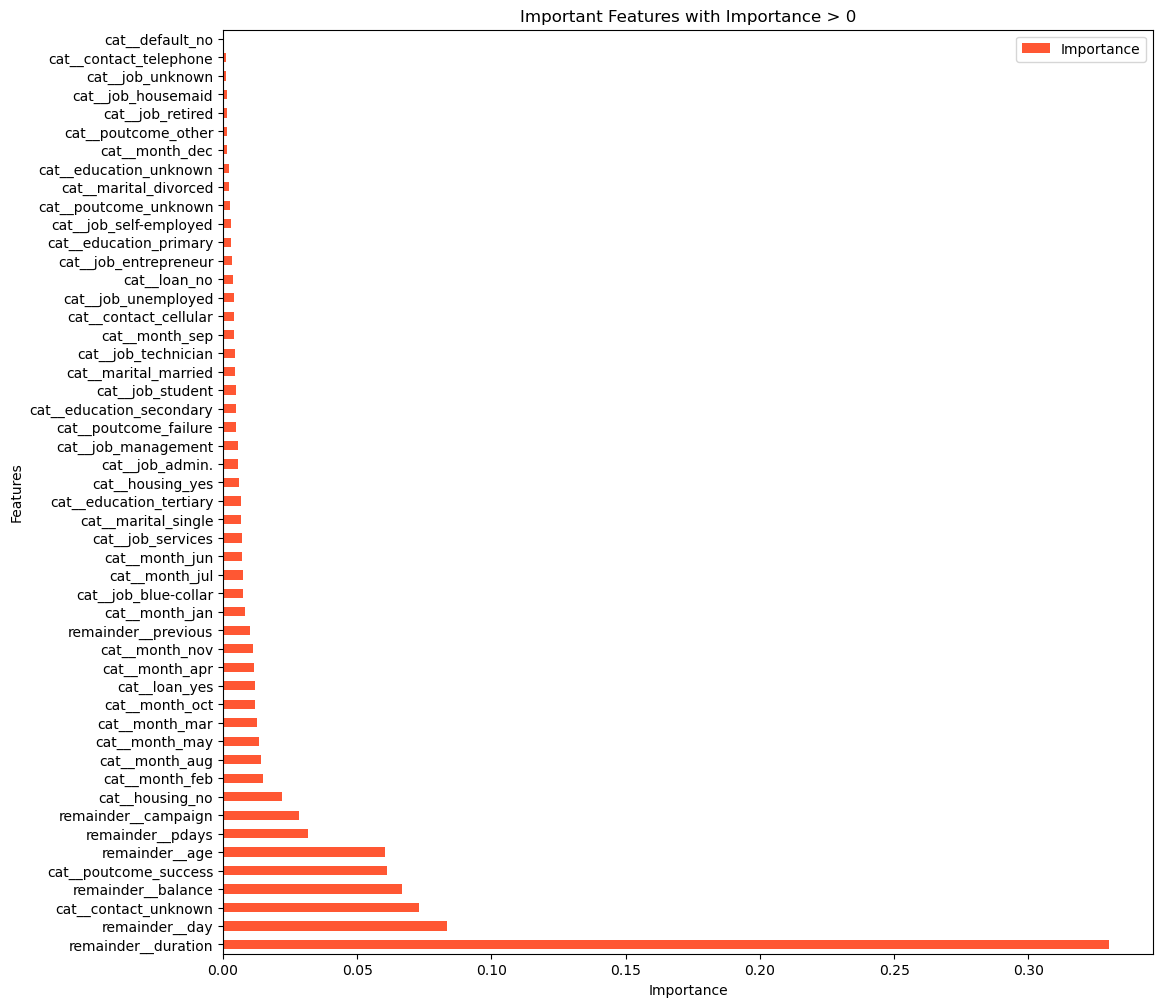

In [265]:
important_features = feature_importances[feature_importances['Importance'] > 0]
important_features.plot(kind='barh', x='Feature', y='Importance', color='#FF5733',figsize=(12,12))
plt.title("Important Features with Importance > 0")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

We can see most important feature is call duration

In [268]:
# Select the top 3 features 
top_features = feature_importances['Feature'].iloc[:3].values

X_train_selected = pd.DataFrame(X_train_encoded, columns=encoded_columns)[top_features]
X_test_selected = pd.DataFrame(X_test_encoded, columns=encoded_columns)[top_features]

selected_model = DecisionTreeClassifier(random_state=42)
selected_model.fit(X_train_selected, y_train)


y_test_pred = selected_model.predict(X_test_selected)

y_train_pred = selected_model.predict(X_train_selected)

print(f"Accuracy score of training data {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy score of testing data {accuracy_score(y_test, y_test_pred)}")

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy score of training data 0.9613319011815252
Accuracy score of testing data 0.6816229116945107
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1081
           1       0.67      0.66      0.67      1014

    accuracy                           0.68      2095
   macro avg       0.68      0.68      0.68      2095
weighted avg       0.68      0.68      0.68      2095



Selecting features was a wrong decision with first model as testing accuracy has strongly decreased

In [271]:
#decision tree model with most important features of second model
feature_importances2 = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances2)

Feature Importances:
                      Feature  Importance
47       remainder__duration    0.498636
42     cat__poutcome_success    0.125266
27      cat__contact_unknown    0.123014
36            cat__month_may    0.034341
21           cat__housing_no    0.027753
48       remainder__campaign    0.018925
29            cat__month_aug    0.013848
24             cat__loan_yes    0.013772
28            cat__month_apr    0.013766
45        remainder__balance    0.012873
44            remainder__age    0.012774
46            remainder__day    0.012680
38            cat__month_oct    0.012244
35            cat__month_mar    0.012048
49          remainder__pdays    0.011667
31            cat__month_feb    0.010837
17   cat__education_tertiary    0.007763
33            cat__month_jul    0.007076
32            cat__month_jan    0.006443
37            cat__month_nov    0.006153
14       cat__marital_single    0.004456
50       remainder__previous    0.004102
13      cat__marital_married    0.0

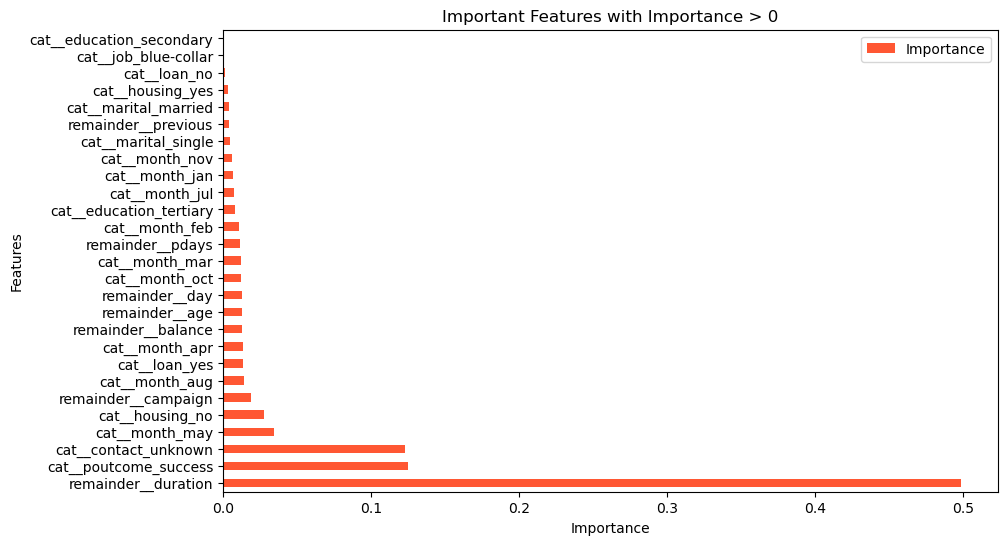

In [273]:
important_features2 = feature_importances2[feature_importances2['Importance'] > 0]

important_features2.plot(kind='barh', x='Feature', y='Importance', color='#FF5733', figsize=(10, 6))
plt.title("Important Features with Importance > 0")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Also here the most important feature is duration

In [275]:
#maybe with setting values of hyperparameter and selecting important features the model may get better 
selected_model2 = DecisionTreeClassifier( 
    max_depth=10,           #limit tree depth
    min_samples_split=30,   #avoid small splits
    min_samples_leaf=50,    #prevent small leaf nodes
    criterion='entropy',       
    random_state=42,)

top_features2 = feature_importances2['Feature'].iloc[:3].values
X_train_selected2 = pd.DataFrame(X_train_encoded, columns=encoded_columns)[top_features2]
X_test_selected2 = pd.DataFrame(X_test_encoded, columns=encoded_columns)[top_features2]

selected_model2.fit(X_train_selected2, y_train)

y_test_pred = selected_model2.predict(X_test_selected2)

y_train_pred = selected_model2.predict(X_train_selected2)

print(f"Accuracy score of training data {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy score of testing data {accuracy_score(y_test, y_test_pred)}")

print("Classification Report:")
print(classification_report(y_test_pred, y_test_pred))

Accuracy score of training data 0.7792099295858694
Accuracy score of testing data 0.7656324582338903
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1096
           1       1.00      1.00      1.00       999

    accuracy                           1.00      2095
   macro avg       1.00      1.00      1.00      2095
weighted avg       1.00      1.00      1.00      2095



The testing accuracy is still low but its better than value of first selected model but this indicates selecting features is a bad decision as it decreases the accuracy

# Grid search
* Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy(optimization).
* GridSearchCV is used to perform the grid search with cross-validation. The grid search algorithm trains k different models and each time uses k-1 subsets (folds) as training data and the rest of the subsets as validation data. For each combination of hyperparameters that are specified in the parameter grid, the decision tree algorithm fits a model using the training data and evaluates its performance on the validation data.
* Once all the models have been trained and evaluated, the grid search selects the combination of hyperparameters that yields the best average performance across all k folds. And that combination of hyperparameters is considered to be an optimal set of hyperparameters for the model.
* Train the model using the optimal hyperparameters: Once you have the best combination of hyperparameters, you retrain your model using these parameters on the entire training dataset.
* Evaluate on the test set: After training the model with the optimal hyperparameters, evaluate its performance on the test set. This will give you an estimate of how the model will perform on real-world, unseen data.
* Drawback of grid search is its computational cost

In [277]:
from sklearn.model_selection import GridSearchCV

#define hyperparameters to tune for the Decision Tree model
param_grid = {
    'criterion': ['gini', 'entropy'],  #split quality metric: Gini Index or Information Gain
    'max_depth': [6,8,10],  #maximum depth of the tree to control overfitting
    'min_samples_split': [20,30,50,70],  #minimum samples required to split an internal node
    'min_samples_leaf': [20,30,50,70],   #minimum samples required to be at a leaf node
    'max_features': [None,'sqrt','log2'],  #number of features to consider for the best split
    'splitter':['best','random'],          #split strategy
    'max_leaf_nodes':[15,20,25],        #maximum number of leaf nodes in the tree
    'random_state': [42]
}


grid_search = GridSearchCV(
    estimator=model, #the model to optimize
    param_grid=param_grid, 
    cv=5,   #5-fold cross-validation
    scoring='accuracy',  
    n_jobs=-1  # Use all available CPU cores for efficiency
)

grid_search.fit(X_train_encoded, y_train)

print("Best Parameters :", grid_search.best_params_)
print("Best Cross-Validation:", grid_search.best_score_)

best_model= grid_search.best_estimator_

best_model.fit(X_train_encoded, y_train)

y_test_pred = best_model.predict(X_test_encoded)

y_train_pred = best_model.predict(X_train_encoded)

print(f"Accuracy score of training data {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy score of testing data {accuracy_score(y_test, y_test_pred)}")

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters : {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 25, 'min_samples_leaf': 20, 'min_samples_split': 20, 'random_state': 42, 'splitter': 'best'}
Best Cross-Validation: 0.8151336871727282
Accuracy score of training data 0.828499820981024
Accuracy score of testing data 0.8190930787589499
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1081
           1       0.80      0.83      0.82      1014

    accuracy                           0.82      2095
   macro avg       0.82      0.82      0.82      2095
weighted avg       0.82      0.82      0.82      2095



We can see the grid search found best hyperparameters which are 

Best Parameters : {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 25, 'min_samples_leaf': 20, 'min_samples_split': 20, 'random_state': 42, 'splitter': 'best'}

which give us the highest testing accuracy so far

Text(70.72222222222221, 0.5, 'Actual Labels')

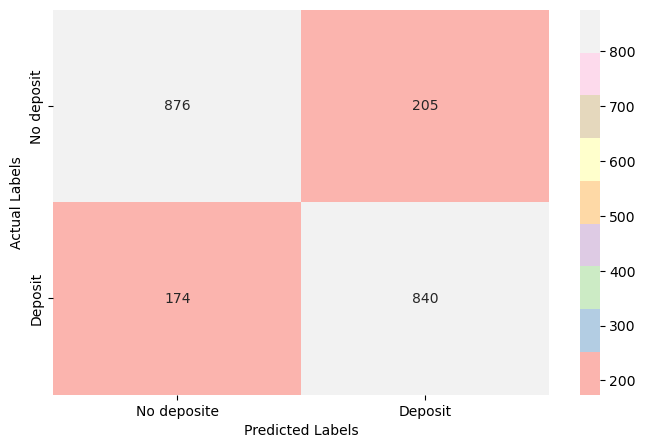

In [169]:
#visual confusion matrix
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=['No deposite', 'Deposit'], yticklabels=['No deposit', 'Deposit'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

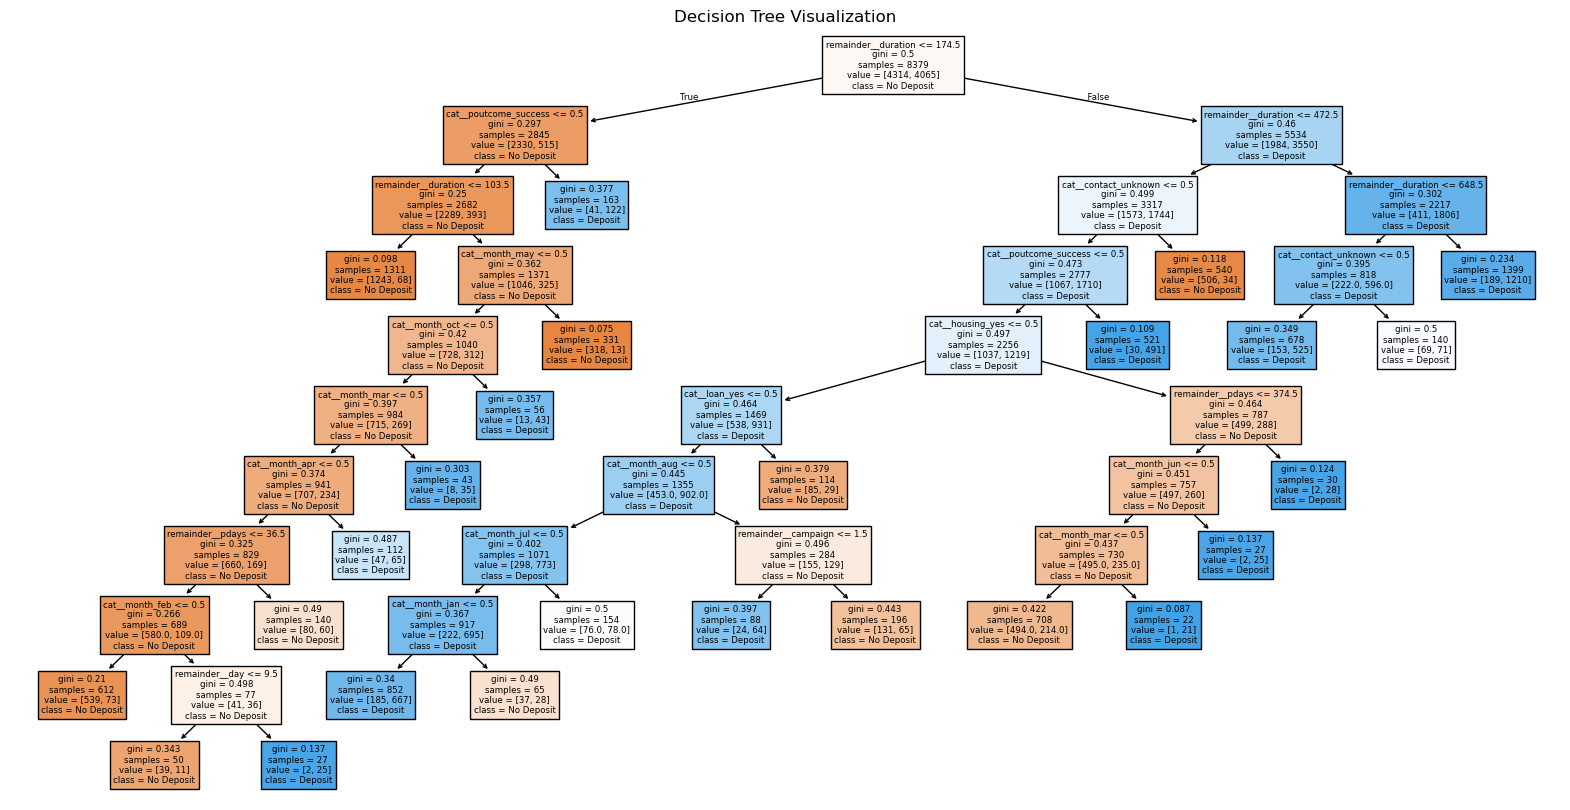

In [170]:
#Visualize the Decision Tree of default model
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=encoded_columns, class_names=['No Deposit', 'Deposit'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

Also the visuallization of decision tree of best model is better than all the previous models

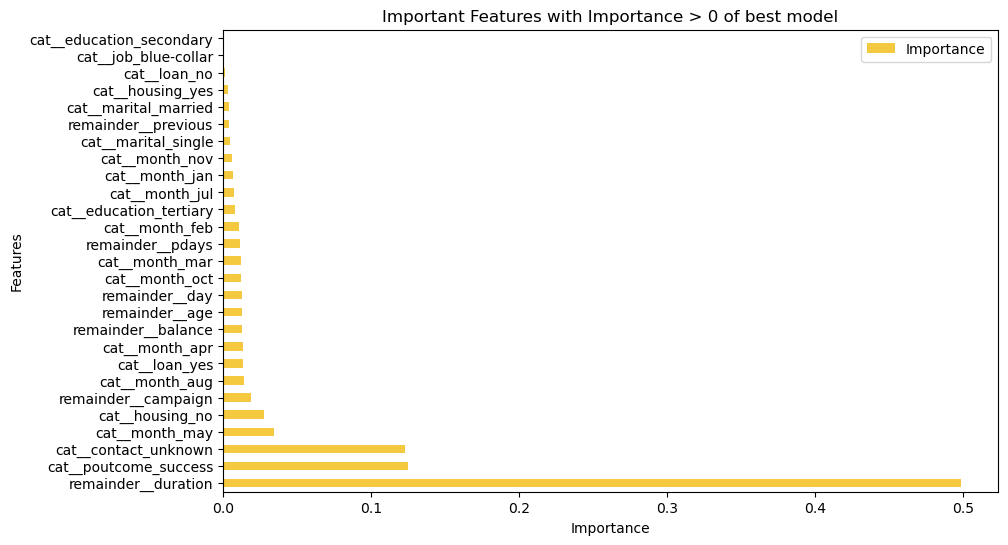

In [279]:
feature_importances = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

important_features = feature_importances[feature_importances['Importance'] > 0]

important_features2.plot(kind='barh', x='Feature', y='Importance', color='#F5C93F', figsize=(10, 6))
plt.title("Important Features with Importance > 0 of best model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Also with best model the most important feature is duration

In [300]:
new_data_encoded = encoder.transform(new_data)

predicted_class = best_model.predict(new_data_encoded)
print("Predicted class:", predicted_class[0])

predicted_prob = best_model.predict_proba(new_data_encoded)
print("Predicted probabilities:", predicted_prob[0])


Predicted class: 1
Predicted probabilities: [0.1350965 0.8649035]


# Conclusion of Decision tree model
* Appling on the dataset the model with default parameters of overfitting leads to overfitting.
* Setting values to parameters of model (controling the max_depth,min_samples_split,min_samples_leaf,criterion) has improved the value of accuracy.
* Selecting the most important features was a bad decision as it has decreased the accuracy.
* After appling Grid search on the default model to select best hyperparameters, we get these values of best hyperparameters:
* {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 25, 'min_samples_leaf': 20, 'min_samples_split': 20, 'random_state': 42, 'splitter': 'best'}
* And we get from the best model accuracy equals to 82% which is the highest value we reached using decision tree
 

# Comparisons

Model: Naive Bayes
Accuracy: 0.7227
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1081
           1       0.79      0.58      0.67      1014

    accuracy                           0.72      2095
   macro avg       0.74      0.72      0.72      2095
weighted avg       0.74      0.72      0.72      2095

Confusion Matrix:
[[926 155]
 [426 588]]
--------------------------------------------------


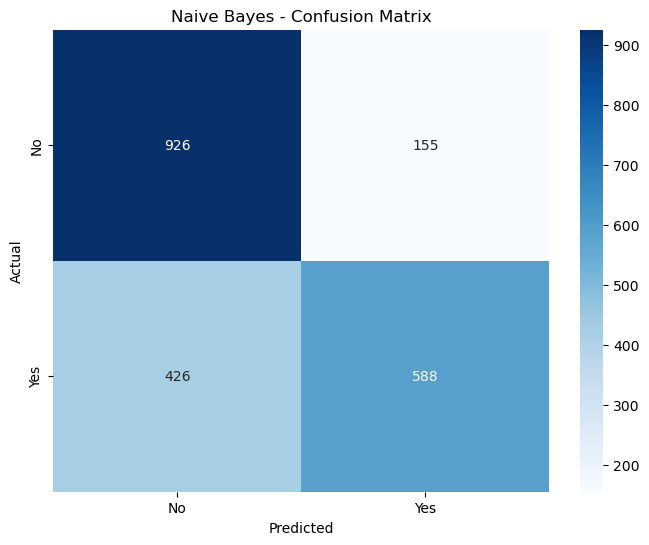

Model: KNN
Accuracy: 0.7990
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1081
           1       0.81      0.76      0.78      1014

    accuracy                           0.80      2095
   macro avg       0.80      0.80      0.80      2095
weighted avg       0.80      0.80      0.80      2095

Confusion Matrix:
[[906 175]
 [246 768]]
--------------------------------------------------


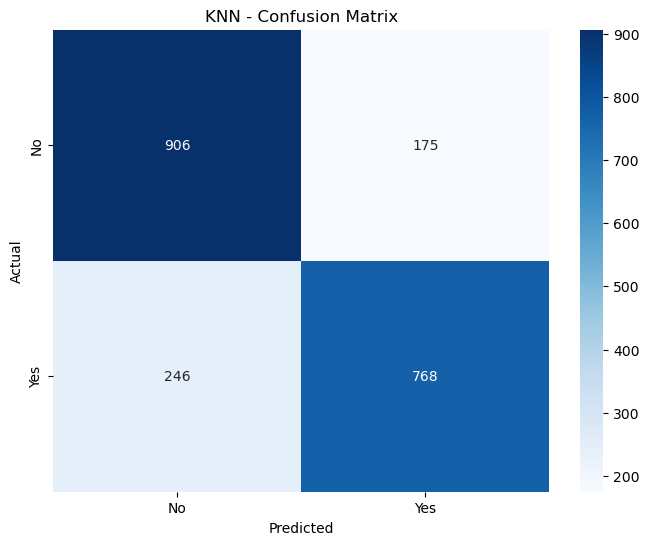

Model: Decision Tree
Accuracy: 0.7895
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1081
           1       0.79      0.78      0.78      1014

    accuracy                           0.79      2095
   macro avg       0.79      0.79      0.79      2095
weighted avg       0.79      0.79      0.79      2095

Confusion Matrix:
[[865 216]
 [225 789]]
--------------------------------------------------


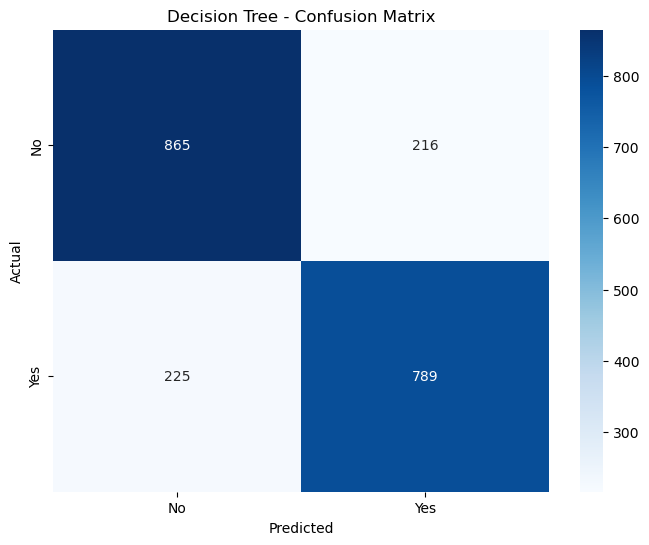

Model: SVM
Accuracy: 0.8501
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1081
           1       0.83      0.88      0.85      1014

    accuracy                           0.85      2095
   macro avg       0.85      0.85      0.85      2095
weighted avg       0.85      0.85      0.85      2095

Confusion Matrix:
[[893 188]
 [126 888]]
--------------------------------------------------


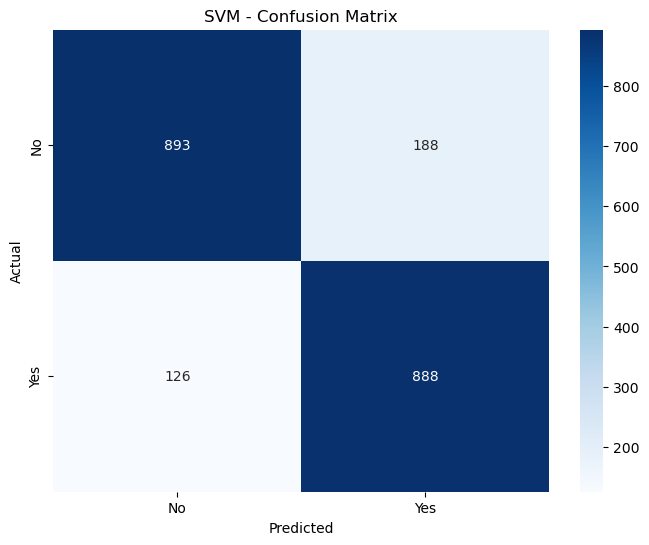

In [304]:
# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Results storage
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Save the results for comparison
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep,
        "Confusion Matrix": confusion_mat
    }

# Print results for comparison
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("-" * 50)

    # Confusion Matrix visualization
    cm = result['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Conclusion

# Naive Bayes:
* High recall for class 0 (No), but lower recall for class 1 (Yes), leading to a lower overall recall.
* It struggles more with predicting class 1 correctly.


# KNN:
* This model has balanced precision and recall, with slightly better performance for class 1 (Yes).
* It has a higher overall accuracy than Naive Bayes and Decision Tree.

# Decision Tree:
* Decision Tree gives relatively balanced performance between precision and recall for both classes.
* Slightly worse accuracy compared to KNN, but it still provides a solid performance overall.


# SVM:
* SVM outperforms the other models in terms of accuracy and balances precision and recall very well for both classes.
* It has the highest accuracy and a good trade-off between precision and recall.


# Best Accuracy:
* SVM with 85.01% accuracy.


# Best Precision and Recall Balance:
* KNN, with precision and recall close to each other for both classes.


# Best Recall for Class 1 (Yes): 
* SVM, with 0.88 recall for class 1, indicating it correctly predicts Yes cases most frequently.
* # Best Recall for Class 0 (No):
* Naive Bayes, with 0.86 recall for class 0.


# Best Precision for Class 1 (Yes):
* KNN, with 0.81 precision for class 1, meaning it's better at predicting Yes cases as compared to the other models.
# Best Precision for Class 0 (No):
* SVM, with 0.88 precision for class 0.

# SVM seems to be the best performing model for both Class 0 (No) and Class 1 (Yes), making it the most reliable choice if you need a model that performs well across both classes.